# Lead Scoring Analysis and Prediction 

# Data Cleaning

## Import data and required packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
lead_data = pd.read_csv("/Users/0s/Downloads/Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
lead_data.shape

(9240, 37)

There are 9420 rows and 37 columns in the lead dataset.

In [5]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

The data types of the columns are float, integer and object type. We can see there are some null values in the column.

In [6]:
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
lead_data.describe(percentiles=[.01,.05,.1,.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
1%,580317.120000,0.000000,0.000000,0.000000,0.000000,10.000000,13.000000
5%,582869.900000,0.000000,0.000000,0.000000,0.000000,12.000000,14.000000
10%,586361.700000,0.000000,0.000000,0.000000,0.000000,13.000000,15.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000


There are some outliers present in a few columns like: TotalVisits, Total Time Spent on Website, Page Views Per Visit.

### Checking the percentage of missing values

In [8]:
round(100*(lead_data.isnull().sum()/len(lead_data.index)),2).sort_values(ascending=False)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

Out of 37 columns present in the dataset, null values appear in 17 columns. 10 of them have more than 25% of the null values.

### Checking if there are columns with one unique value since it won't affect our analysis.

In [9]:
lead_data.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

- The 'Prospect ID' and 'Lead Number' columns are unique, therefore they can be deleted as it cannot be used for prediction.
- Columns: 'Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque' have only one unique value. Then they can be dropped.

### Conversion rate

In [10]:
round(lead_data["Converted"].sum()/len(lead_data),4)*100

38.54

Conversion rate is 38.54%.

### Imbalance ratio

In [11]:
round(len(lead_data[lead_data["Converted"]==0])/len(lead_data[lead_data["Converted"]==1]),4)

1.5948

Imbalance ratio is 1.5948

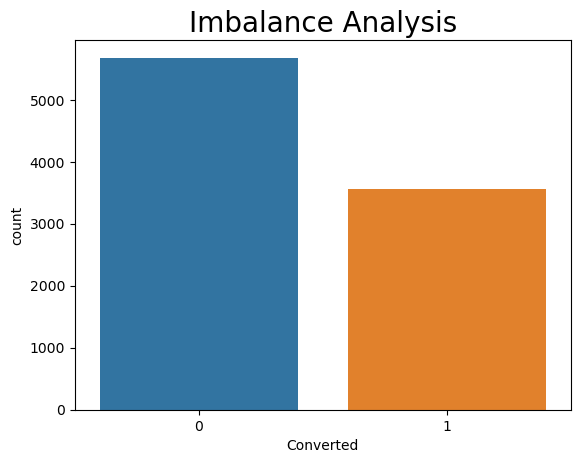

In [12]:
plt.title('Imbalance Analysis', fontsize=20)
sns.countplot(data=lead_data, x='Converted')
plt.show()

## Data cleaning

There are 'Select' values for many columns. This is because a customer did not select any option from the list, therefore it shows select by default.

In [13]:
# Converting 'Select' values to NaN

lead_data = lead_data.replace('Select', np.nan)

In [14]:
# Dropping the duplicate rows

lead_data = lead_data.drop_duplicates()

In [15]:
# Checking the percentage of missing values

round(100*(lead_data.isnull().sum()/len(lead_data.index)),2).sort_values(ascending=False).head(18)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
dtype: flo

In [16]:
# Dropping columns with a certain percentage of NaN values

def drop_missing_data_columns(data, miss_per):
    cols_to_drop = list(round(100*(data.isnull().sum()/len(data.index)),2) >= miss_per)
    dropped_cols = data.loc[:,cols_to_drop].columns
    print("Columns with more than {}% of missing values are: {}".format(miss_per, dropped_cols))
    data = data.drop(dropped_cols,axis=1)
    return data

In [17]:
data = drop_missing_data_columns(lead_data, 40)

Columns with more than 40% of missing values are: Index(['How did you hear about X Education', 'Lead Quality', 'Lead Profile',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')


In [18]:
data.shape

(9240, 30)

7 columns were removed which were having more than 40% of missing values.

In [19]:
# Checking the percentage of missing values on remaining columns

round(100*(data.isnull().sum()/len(data.index)),2).sort_values(ascending=False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Prospect ID                                       0.00
Newspaper                                         0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Ad

In [20]:
# List all numeric and non-numeric columns

non_num_cols = list(data.select_dtypes(include="object"))
num_cols = list(data.select_dtypes(exclude="object"))

### Categorical columns

In [21]:
print("Column: Unique values")
for col in non_num_cols:
    print("-"*50)
    print("{}: {}".format(col, data[col].nunique()))

Column: Unique values
--------------------------------------------------
Prospect ID: 9240
--------------------------------------------------
Lead Origin: 5
--------------------------------------------------
Lead Source: 21
--------------------------------------------------
Do Not Email: 2
--------------------------------------------------
Do Not Call: 2
--------------------------------------------------
Last Activity: 17
--------------------------------------------------
Country: 38
--------------------------------------------------
Specialization: 18
--------------------------------------------------
What is your current occupation: 6
--------------------------------------------------
What matters most to you in choosing a course: 3
--------------------------------------------------
Search: 2
--------------------------------------------------
Magazine: 1
--------------------------------------------------
Newspaper Article: 2
--------------------------------------------------
X Educat

### Numerical columns

In [22]:
for col in non_num_cols:
    if(col=="Prospect ID"):
        pass
    else:
        print("-"*50)
        print(col)
        print(data[col].value_counts())

--------------------------------------------------
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
--------------------------------------------------
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64
--------------------------------------------------
Do Not Email
No     8506
Yes     734
Name: Do Not Ema

In [26]:
# Identifying the constant features

const = []
for col in list(data.columns):
    if data[col].unique().size < 2:
        const.append(col)
print(const)

['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']


In [23]:
def count_plot_converted(col):
    plt.figure(figsize=(10,5))
    sns.countplot(x=col, hue="Converted", data=data)
    plt.xticks(rotation=90)
    plt.legend(loc='upper right')
    plt.show()

## Solving missing values

### Country

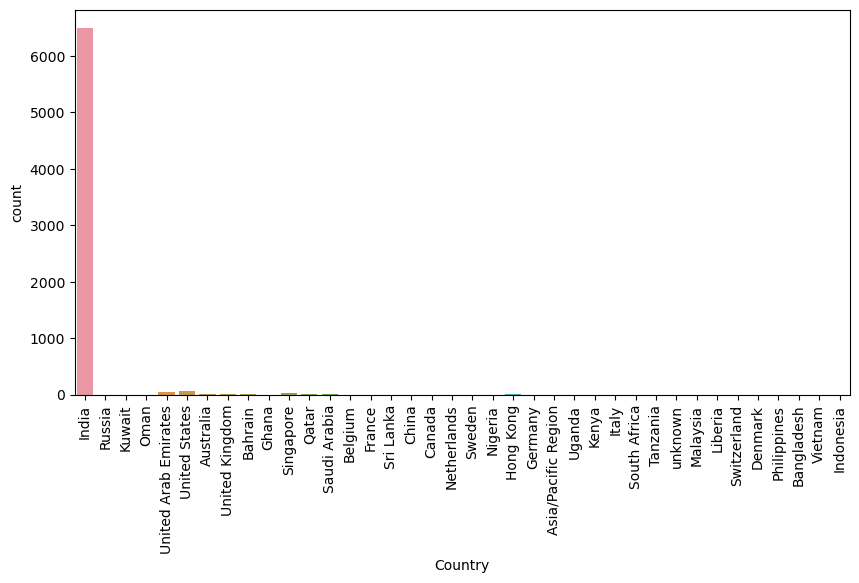

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(x=data['Country'])
plt.xticks(rotation = 90)
plt.show()

- More than 90% of the values are India in 'Country' column.
- Country data is not required for Model building as X Education is online platform. We will drop the country column.

In [25]:
data = data.drop('Country',axis=1)

### City

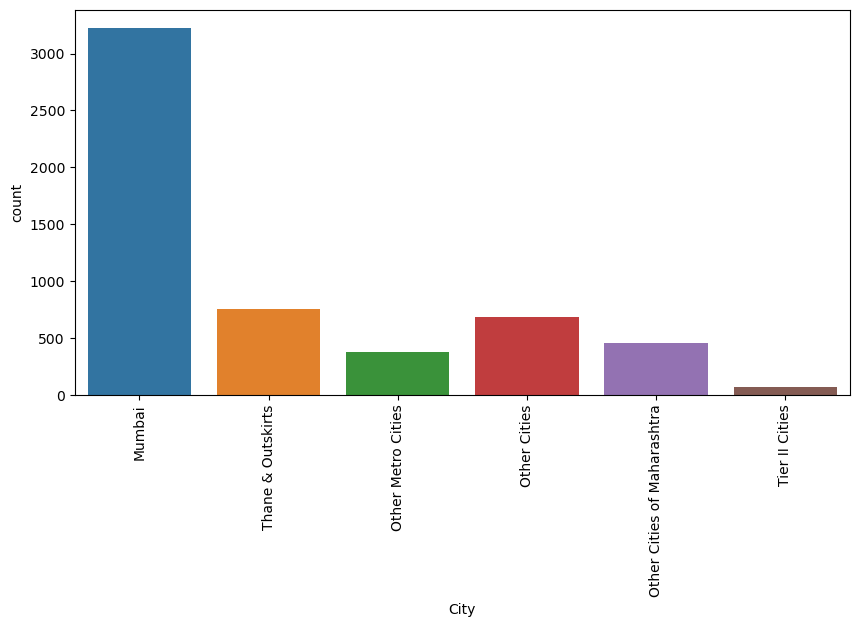

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(x=data['City'])
plt.xticks(rotation=90)
plt.show()

In [27]:
data['City'].value_counts(normalize=True)*100

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64

Nearly 60% of the data are Mumbai, so we can impute Mumbai in those missing values.

In [28]:
data['City'] = data['City'].replace(np.nan, 'Mumbai')

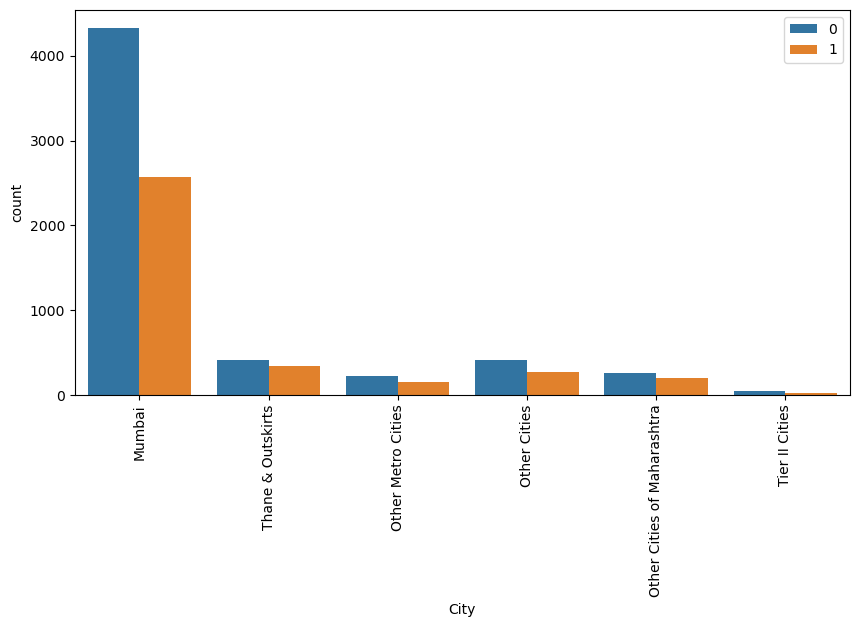

In [29]:
count_plot_converted(data.City)

The majority of conversion is also from Mumbai.

In [30]:
data['City'].value_counts(normalize=True)*100

Mumbai                         74.577922
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

- We cannot impute with mode as it will make the whole dataset skewed.
- Also, X Education is online teaching platform.
- Then the city information will not be much useful as potential students can learn these course anywhere.

In [31]:
data.drop("City",axis=1,inplace=True)

### Specialization

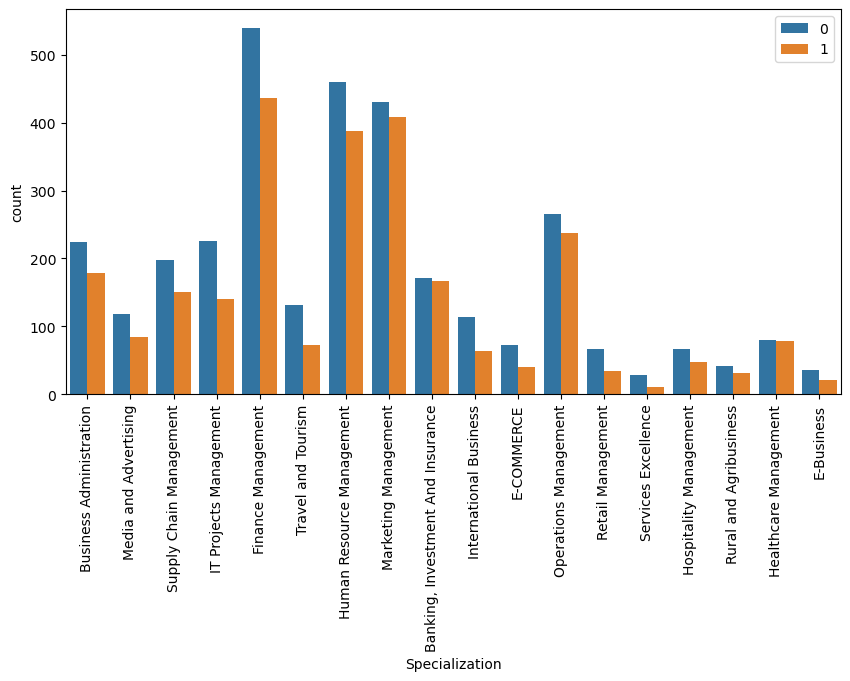

In [32]:
count_plot_converted(data.Specialization)

- Lead did not enter any specialization if his/her option is either not available on the list or is a student.
- Therefore, we can make a category 'Not Specified' for missing values.

In [33]:
data['Specialization'] = data['Specialization'].replace(np.nan, 'Not Specified')

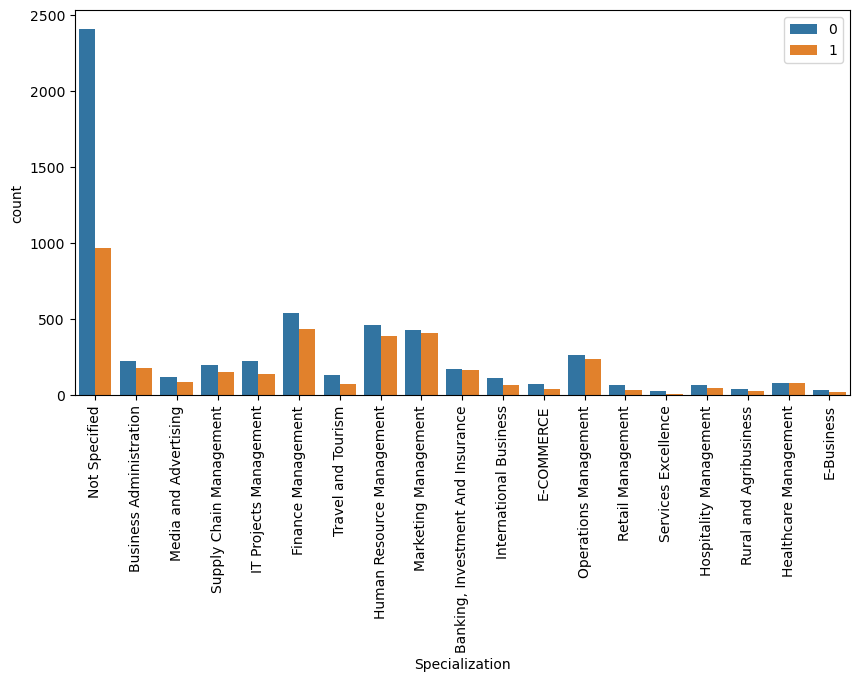

In [35]:
count_plot_converted(data.Specialization)

- Majority of conversion is from Not Specified.
- Specialization with something in Management tend to have higher number of leads. Therefore, they are significant variables and can not be dropped.

- We can combine Management Specializations because they show similar trends.
- We can replace specialization with low frequency with 'Other Specialization'.

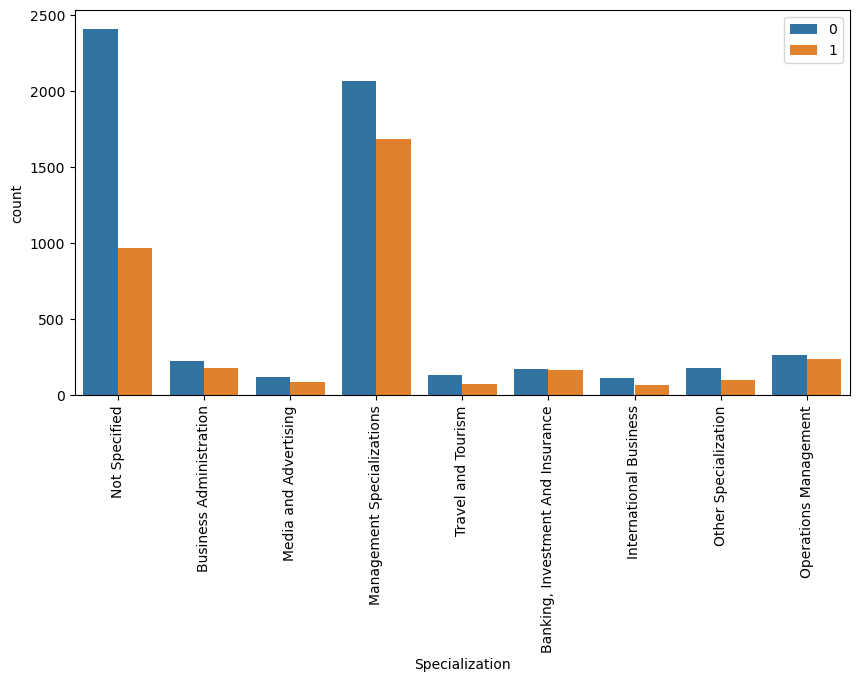

In [36]:
data['Specialization'] = data['Specialization'].replace(['Finance Management', 'Human Resource Management', 'Marketing Management', 'Operation Management', 'IT Projects Management', 'Supply Chain Management', 'Healthcare Management', 'Hospitality Management', 'Retail Management'], 'Management Specializations')
data['Specialization'] = data['Specialization'].replace(['Services Excellence', 'E-Business', 'Rural and Agribusiness', 'E-COMMERCE'], 'Other Specialization')

count_plot_converted(data.Specialization)

### Tags

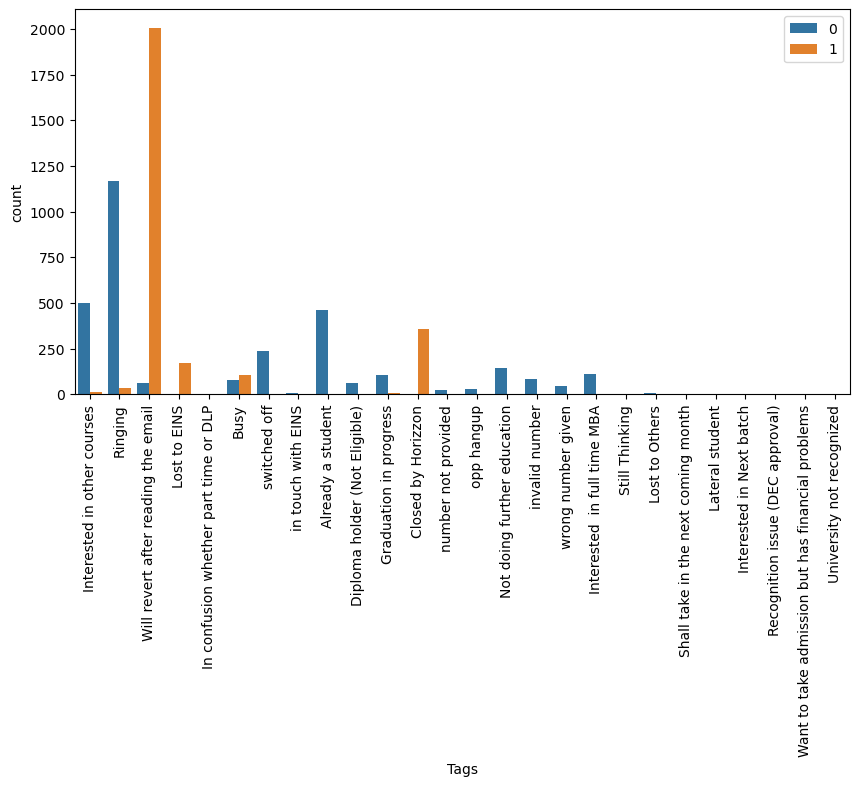

In [37]:
count_plot_converted(data.Tags)

Blanks in the tag column may be imputed by "Will revert after reading the email".

In [38]:
data['Tags'] = data['Tags'].fillna(data['Tags'].mode()[0])

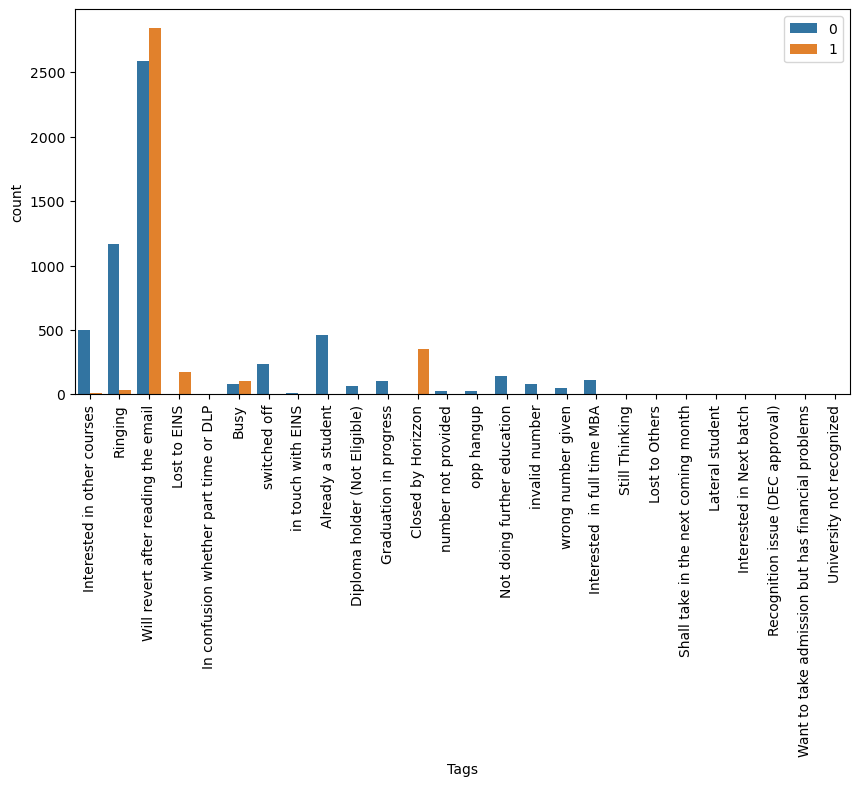

In [39]:
count_plot_converted(data.Tags)

The majority of convertion is from "Will revert after reading the email".

### What matters most to you in choosing a course

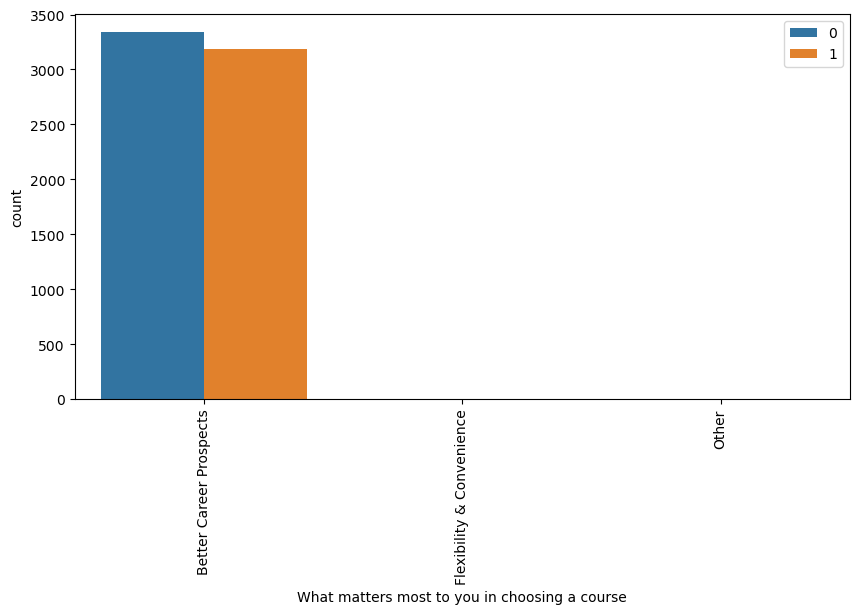

In [40]:
count_plot_converted(data['What matters most to you in choosing a course'])

The majority of data is 'Better Career Prospects', as the data is skewed, we can delete the column.

In [41]:
data = data.drop('What matters most to you in choosing a course', axis = 1)

### What is your current occupation

In [42]:
data['What is your current occupation'].value_counts(normalize=True)*100

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

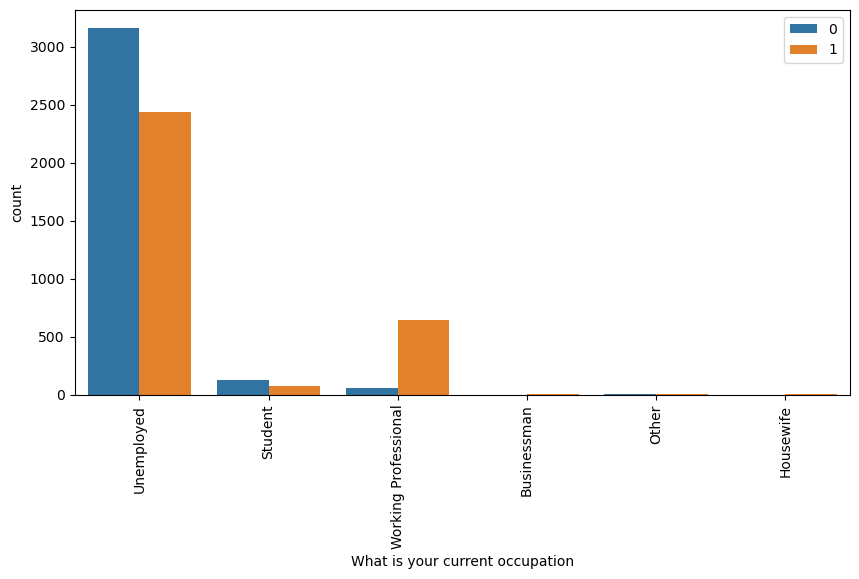

In [43]:
count_plot_converted(data['What is your current occupation'])

- About 85.5% leads are "Unemployed".
- If we impute the data as "Unemployed" then data will become more skewed. Therefore, we will impute the value as "Unknown".

In [44]:
data['What is your current occupation'] = data['What is your current occupation'].replace(np.nan, 'Unknown')

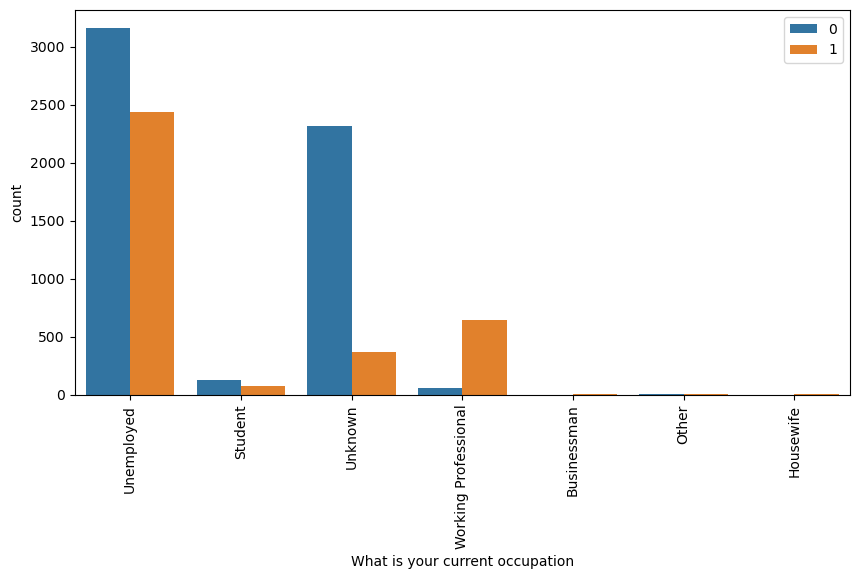

In [45]:
count_plot_converted(data['What is your current occupation'])

- The majority conversion is from Umemployed.
- Leads that are Working Professional have highest conversion rate.

In [46]:
# Checking the percentage of missing values

round(100*(data.isnull().sum()/len(data.index)),2).sort_values(ascending=False).head(7)

TotalVisits                               1.48
Page Views Per Visit                      1.48
Last Activity                             1.11
Lead Source                               0.39
Prospect ID                               0.00
X Education Forums                        0.00
A free copy of Mastering The Interview    0.00
dtype: float64

The rest of those columns that have missing values are under 2%, so we can drop these rows.

In [47]:
data.dropna(inplace=True)

In [48]:
# Rechecking the percentage of missing values

round(100*(data.isnull().sum()/len(data.index)),2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses  

### Lead Source

In [49]:
# Changing google to Google

data["Lead Source"] = data["Lead Source"].replace('google',"Google")

In [50]:
# Replacing NaN values and combining low frequency occuring labels under a common label 'Others'

data['Lead Source'] = data['Lead Source'].replace(np.nan,'Others')
data['Lead Source'] = data['Lead Source'].replace('Facebook','Social Media')
data['Lead Source'] = data['Lead Source'].replace(['bing','Click2call', 'Presee_Release',
                                                 'youtubechannel','welearnblog_Home',
                                                 'WeLearn','blog','Pay per Click Ads',
                                                 'testone','NC_EDM'], 'Others')

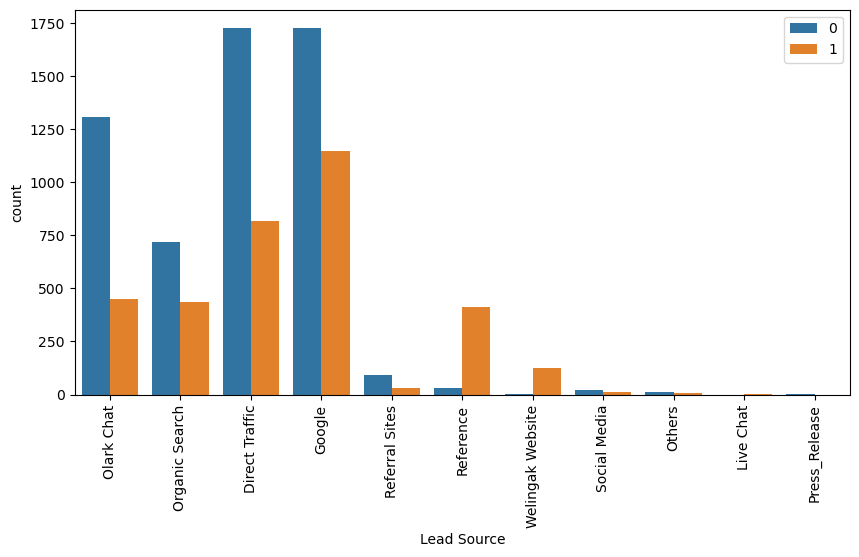

In [51]:
count_plot_converted(data['Lead Source'])

- Most of the leads are from Google and Direct Traffic.
- Conversion rate of Feference and Weilingak Website is high.

### Last Actitity

In [52]:
data['Last Activity'].value_counts(dropna=False)

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [53]:
# Replacing NaN values and combining low frequency values

data['Last Activity'] = data['Last Activity'].replace(np.nan,'Others')
data['Last Activity'] = data['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                       'Had a Phone Conversation', 'View in browser link Clicked',
                                                       'Approached upfront', 'Email Received',
                                                       'Email Marked Spam', 'Visited Booth in Tradeshow',
                                                       'Resubscribed to emails'],'Others')

In [54]:
data['Last Activity'].value_counts(dropna=False)

Email Opened                 3432
SMS Sent                     2716
Olark Chat Conversation       972
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 312
Email Link Clicked            267
Others                        191
Form Submitted on Website     116
Name: Last Activity, dtype: int64

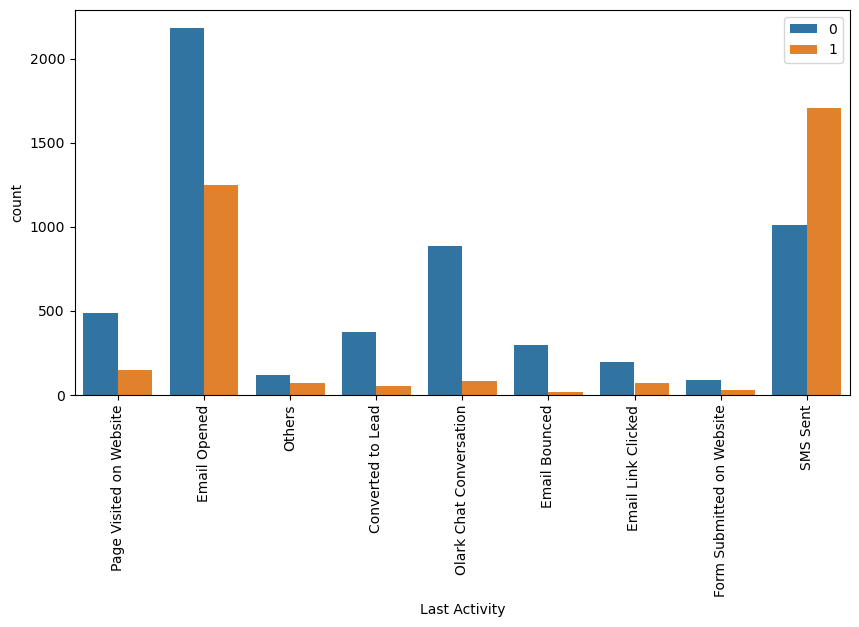

In [55]:
count_plot_converted(data['Last Activity'])

- Most of the leads have email opened, followed by SMS sent as their last acitivity.
- Conversion rate for leads with SMS sent as last activity is very high.

### Lead Origin

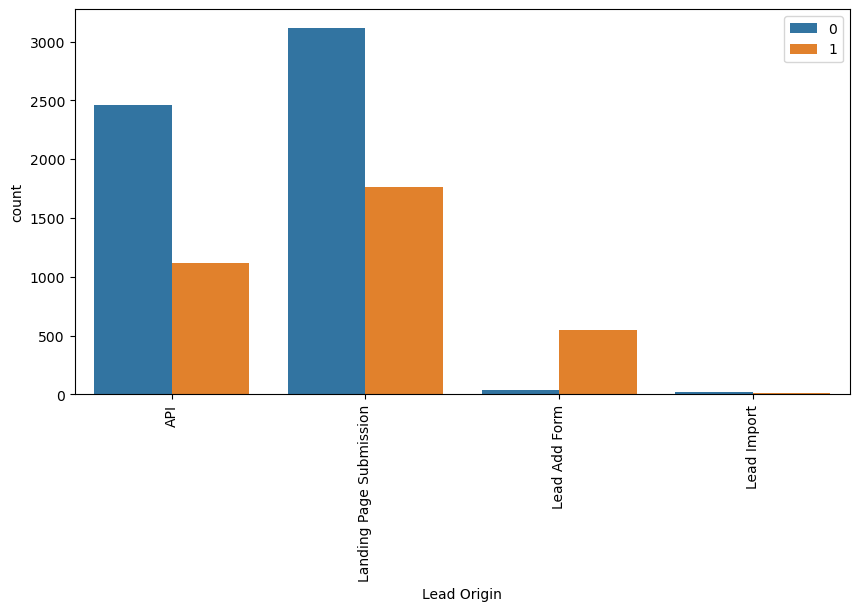

In [56]:
count_plot_converted(data['Lead Origin'])

- API and Landing Page Submission bring higher number of leads as well as conversion.
- Lead Add Form has a very high conversion rate, but count of leads are not very high.
- Lead Import does not have many values and the conversion rate is also the lowest.
- To improve overall lead conversion rate, we have to improve lead conversion of API and Landing Page Submission origin, and generate more leads from Lead Add Form.

### Last Notable Activity

In [57]:
# Checking value counts of Last Notable Activity

data['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [58]:
# Combing low frequency values

data['Last Notable Activity'] = data['Last Notable Activity'].replace(['Had a Phone Conversation','Email Marked Spam','Approached upfront','Resubscribed to emails','View in browser link Clicked','Form Submitted on Website','Email Received'],'Other Notable Activity')

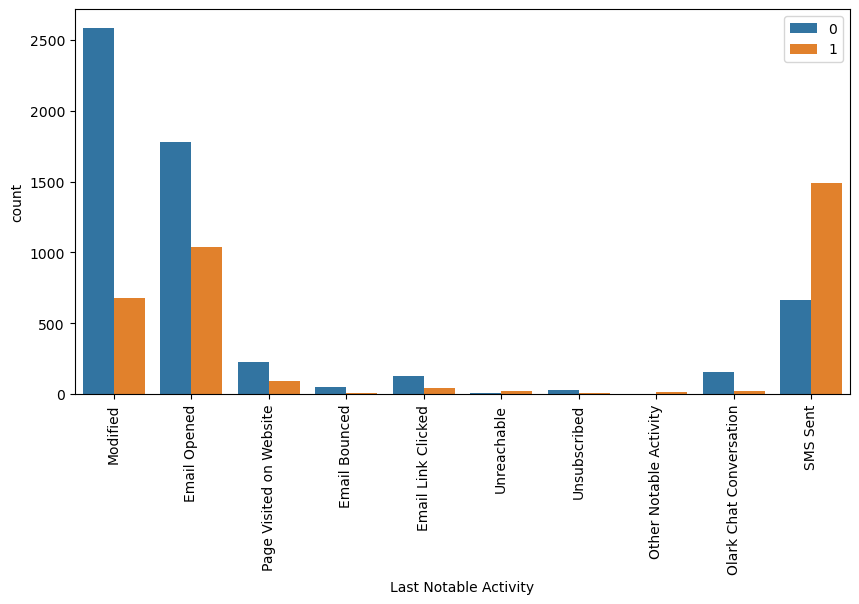

In [59]:
count_plot_converted(data['Last Notable Activity'])

## Deleting imbalanced columns

In [60]:
data.shape

(9074, 27)

In [61]:
data[["Prospect ID", "Lead Number"]].nunique()

Prospect ID    9074
Lead Number    9074
dtype: int64

'Prospect ID' and 'Lead Number' are all unique values. We can drop these columns.

In [62]:
data = data.drop(["Prospect ID", "Lead Number"],1)

In [63]:
# Identifying the value counts of the features

varList=['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
        'Get updates on DM Content', 'I agree to pay the amount through cheque']

for col in varList:
    print(data[col].value_counts(dropna=False))
    print("-"*50)

No    9074
Name: Magazine, dtype: int64
--------------------------------------------------
No    9074
Name: Receive More Updates About Our Courses, dtype: int64
--------------------------------------------------
No    9074
Name: Update me on Supply Chain Content, dtype: int64
--------------------------------------------------
No    9074
Name: Get updates on DM Content, dtype: int64
--------------------------------------------------
No    9074
Name: I agree to pay the amount through cheque, dtype: int64
--------------------------------------------------


These columns in varList have only 'No' as values. We can drop these columns.

In [64]:
data = data.drop(varList,1)

# Exploratory Data Analysis

## Univariate and bivariate analysis

In [65]:
# Identifying categorical, boolean and numeric features for analysis

targetFeature = []
categoricalFeatures = []
booleanFeatures = []
numericalFeatures = []

for col in data.columns:
    if col in ('Converted'):
        targetFeature.append(col)
    elif data[col].nunique() == 2: #features with only 2 unique values are boolean
        booleanFeatures.append(col)
    elif data[col].dtype == 'object':
        categoricalFeatures.append(col)
    elif data[col].dtype in ('int64','float64'):
        numericalFeatures.append(col)
    else:
        numericalFeatures.append(col)

In [66]:
print('The Target Feature is: {}\n \n '.format(targetFeature))
print('The Boolean Features are: {}\n \n '.format(booleanFeatures))
print('The Categorical Features are: {}\n \n '.format(categoricalFeatures))
print('The Numeric Features are: {}\n \n '.format(numericalFeatures))

The Target Feature is: ['Converted']
 
 
The Boolean Features are: ['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']
 
 
The Categorical Features are: ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags', 'Last Notable Activity']
 
 
The Numeric Features are: ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
 
 


## Analysis of Boolean Features

In [67]:
# Converting the values 'Yes' and 'No' to 1 and 0 in the Binary features

def binary_map(x):
    return x.map({'Yes':1, 'No':0})

data[booleanFeatures] = data[booleanFeatures].apply(binary_map)

# Converting the boolean features to type boolean
data[booleanFeatures] = data[booleanFeatures].astype('int64')

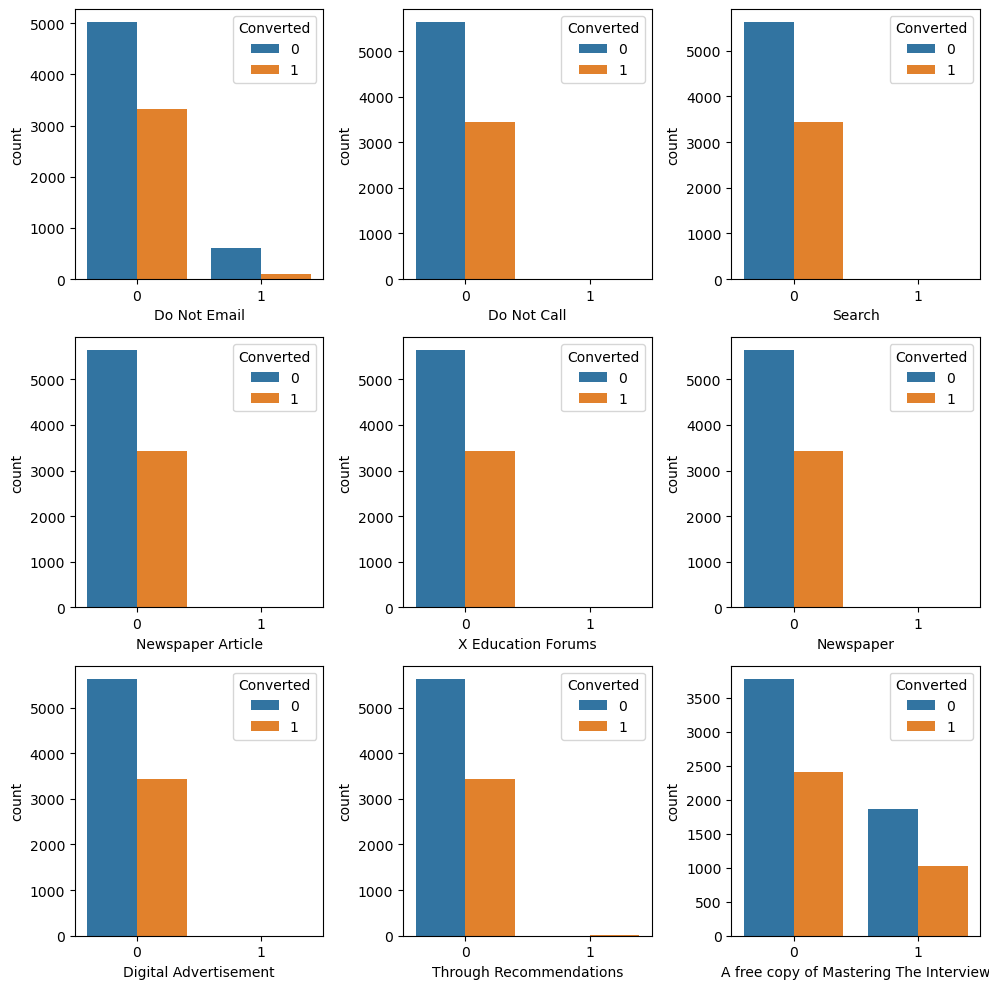

In [68]:
plt.figure(figsize = (10,10))
for i, x_var in enumerate(booleanFeatures):
    plt.subplot(3,3,i+1)
    chart = sns.countplot(x = x_var, data = data, hue = 'Converted')
    chart.set_xticklabels(chart.get_xticklabels())
    plt.tight_layout()

In [69]:
# Identifying the value counts of the boolean features

for col in booleanFeatures:
    print(data[col].value_counts(dropna=False))
    print("-"*50)

0    8358
1     716
Name: Do Not Email, dtype: int64
--------------------------------------------------
0    9072
1       2
Name: Do Not Call, dtype: int64
--------------------------------------------------
0    9060
1      14
Name: Search, dtype: int64
--------------------------------------------------
0    9072
1       2
Name: Newspaper Article, dtype: int64
--------------------------------------------------
0    9073
1       1
Name: X Education Forums, dtype: int64
--------------------------------------------------
0    9073
1       1
Name: Newspaper, dtype: int64
--------------------------------------------------
0    9070
1       4
Name: Digital Advertisement, dtype: int64
--------------------------------------------------
0    9067
1       7
Name: Through Recommendations, dtype: int64
--------------------------------------------------
0    6186
1    2888
Name: A free copy of Mastering The Interview, dtype: int64
--------------------------------------------------


- Only 2 columns: 'A free copy of Mastering The Interview' and 'Do Not Email' have significant values for 1 and 0. Therefore we can drop the rest of the binary variables.
- For column 'Do not email', majority of the people are okay with receiving email. Customers who have opted out of receiving an email have lower rate of conversion.
- For column 'Do not call', majority of the people are okay with receiving a call as there is no value of conversion for 'Yes' value.

In [70]:
cols_to_drop = []
cols_to_drop = ['Do Not Call',
               'Search',
               'Newspaper Article',
               'X Education Forums',
               'Newspaper',
               'Digital Advertisement',
               'Through Recommendations']

data = data.drop(cols_to_drop,1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   int64  
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Last Activity                           9074 non-null   object 
 8   Specialization                          9074 non-null   object 
 9   What is your current occupation         9074 non-null   object 
 10  Tags                                    9074 non-null   obje

In [72]:
data.shape

(9074, 13)

## Analysis of Cateforical Features

### Last Activity

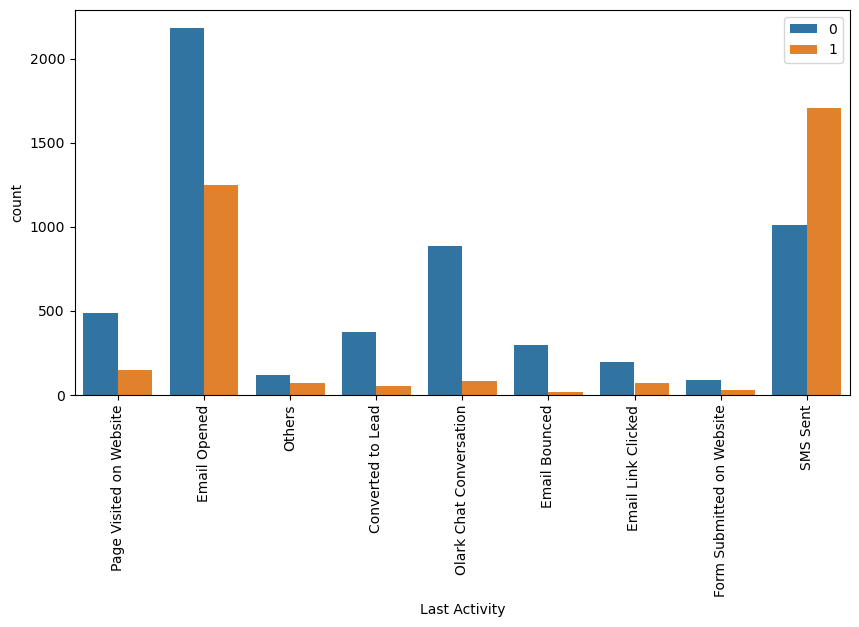

In [73]:
count_plot_converted(data['Last Activity'])

- Most of the leads have Email Opened, followed by SMS Sent as their last activity.
- Conversion rate for leads with SMS Sent as last activity is very high.

### Lead Source

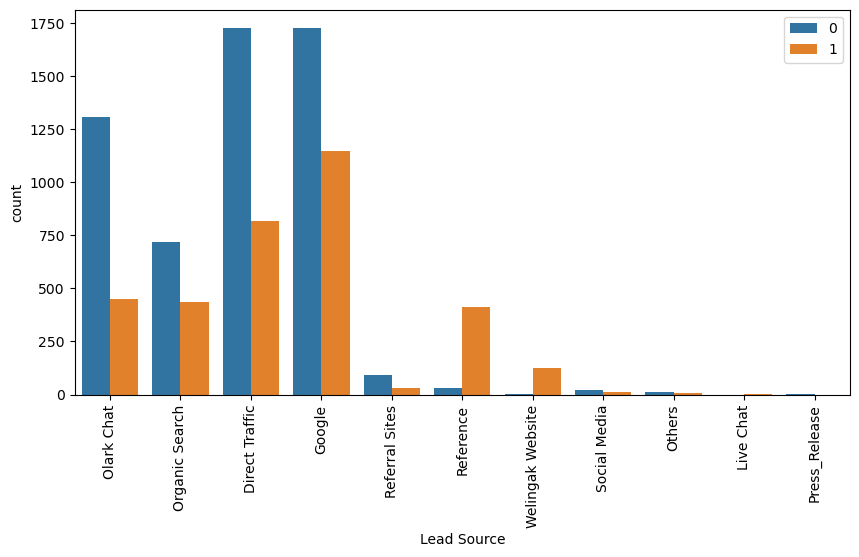

In [74]:
count_plot_converted(data['Lead Source'])

- The source of most leads were from Google, Direct Traffic, Olark Chat, and Organic Search.
- Leads from Referral Sites and Weilingak Website have higher conversion rate, but low number of leads.
- To increase overall lead conversion rate, lead conversion from Google, Direct Traffic, Olark Chat, and Organic Search must be increased, and existing members must refer more.

## Analysis of Numerical Features

### TotalVisits

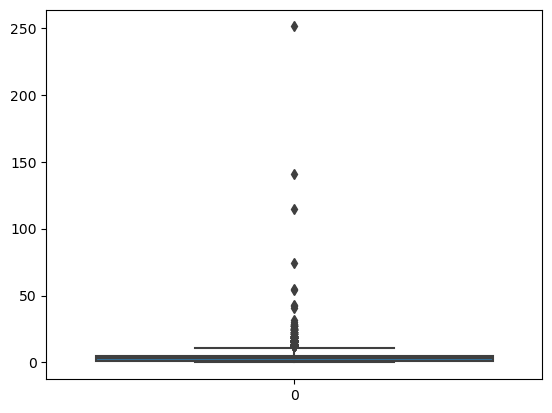

In [75]:
sns.boxplot(data['TotalVisits'])
plt.show()

In [76]:
data['TotalVisits'].describe(percentiles=[0.05,.25,.5,.75,.90,.95,.99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

There are some outliers present. Let's take the outliers at 0.01 and 0.95 for analysis.

In [77]:
percentiles = data['TotalVisits'].quantile([0.01,0.95]).values
data['TotalVisits'][data['TotalVisits'] <= percentiles[0]] = percentiles[0]
data['TotalVisits'][data['TotalVisits'] >= percentiles[1]] = percentiles[1]

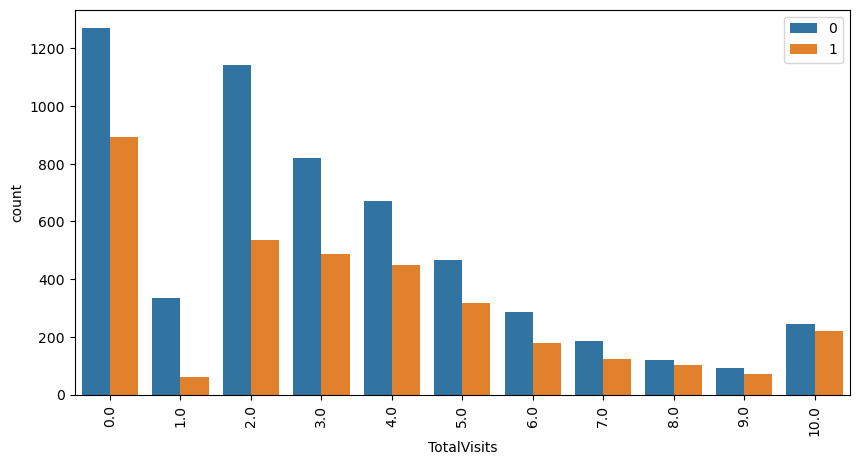

In [78]:
count_plot_converted(data.TotalVisits)

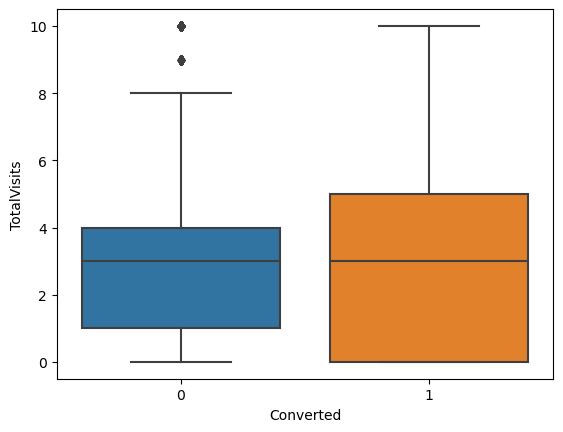

In [79]:
sns.boxplot(y='TotalVisits', x='Converted',data=data)
plt.show()

- Median for converted and not converted leads are the same.
- Higher conversion rate with increase in the total number of visits per customer.

### Total Time Spent on Website

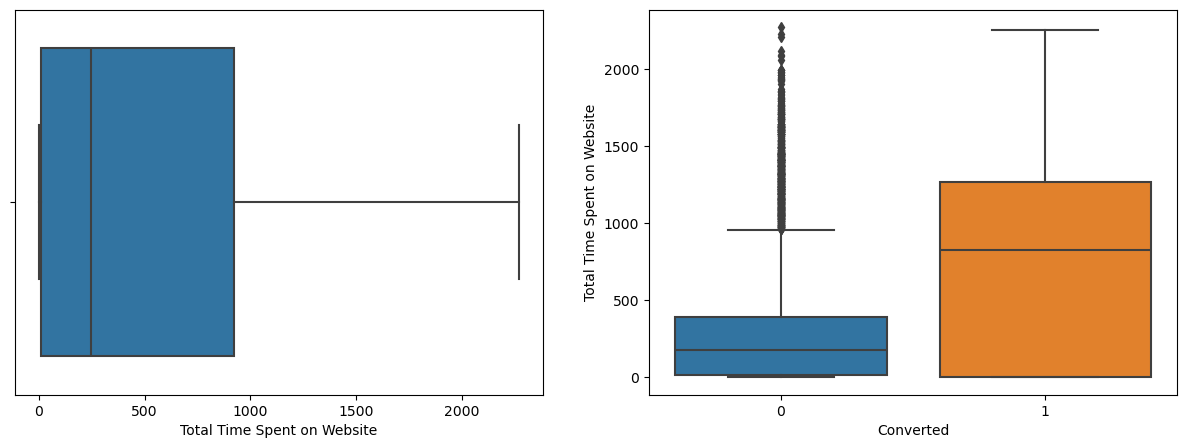

In [81]:
fig, axis = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='Total Time Spent on Website', data = data, ax = axis[0])
sns.boxplot(y='Total Time Spent on Website', x = 'Converted', data = data, ax = axis[1])

plt.show()

Customers who spent more time on the website are more likely to be converted.

### Page Views Per Visit

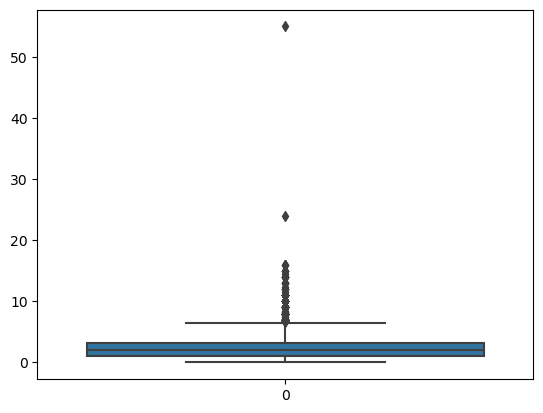

In [83]:
sns.boxplot(data['Page Views Per Visit'])
plt.show()

In [84]:
data['Page Views Per Visit'].describe(percentiles=[.05,.25,.5,.75,.90,.95,.99])

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.200000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

There are some outliers present. Let's take the outliers at 0.01 and 0.95 for analysis.

In [85]:
percentiles = data['Page Views Per Visit'].quantile([0.01,0.95]).values
data['Page Views Per Visit'][data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
data['Page Views Per Visit'][data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

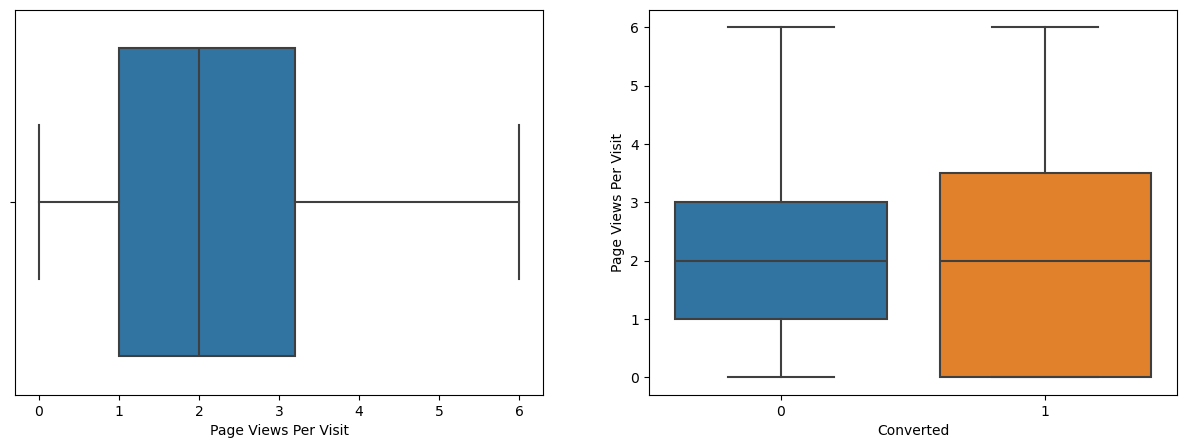

In [86]:
fig, axis = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='Page Views Per Visit', data = data, ax=axis[0])
sns.boxplot(y='Page Views Per Visit', x = 'Converted', data = data, ax=axis[1])

plt.show()

- Median for converted and not converted leads are the same.
- After handling the outliers, the mean of columns 'TotalVisits' and 'Page Views Per Visit' are the same for converted and non converted leads.
- We impute the NaN values in these columns with median values.

In [88]:
data['Page Views Per Visit'].fillna(data['Page Views Per Visit'].median(),inplace=True)
data['TotalVisits'].fillna(data['TotalVisits'].median(),inplace=True)

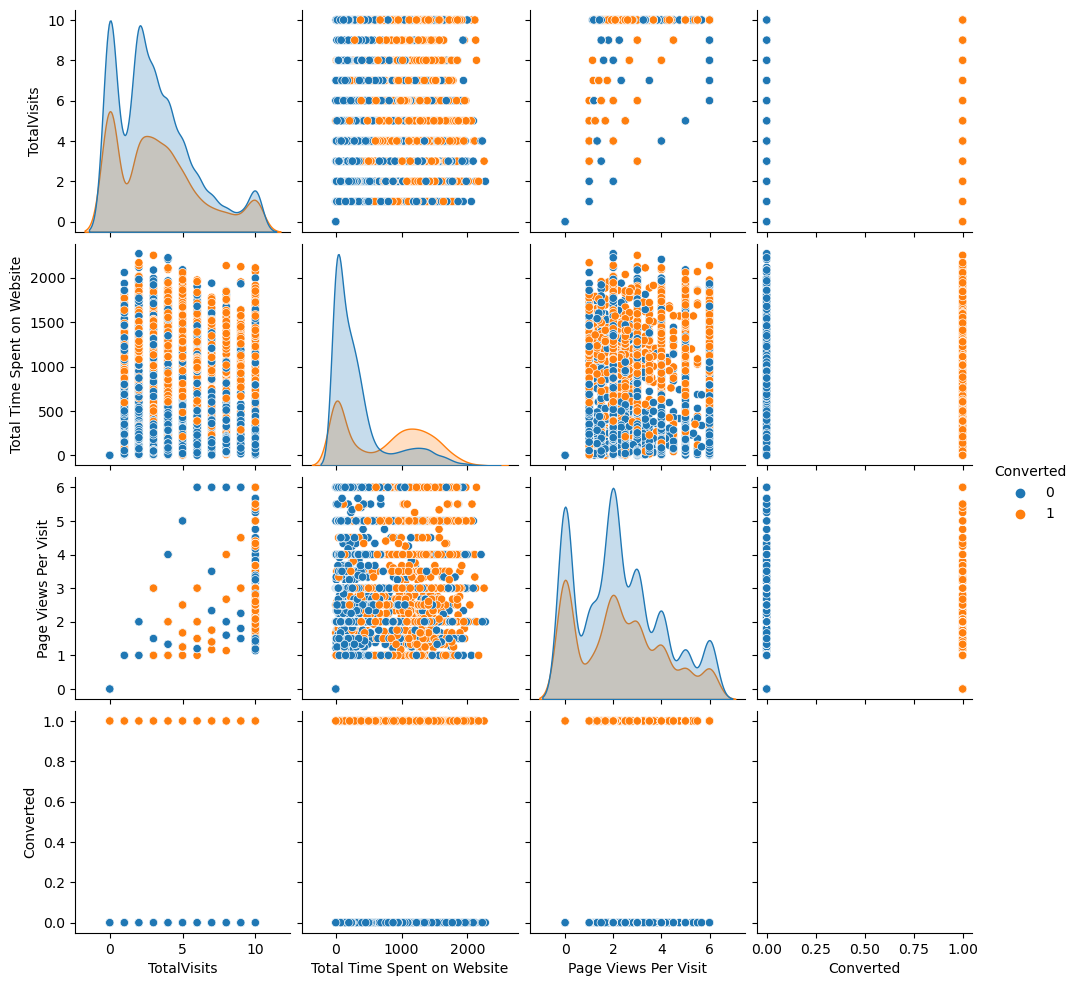

In [89]:
sns.pairplot(data, hue='Converted', vars=numericalFeatures + targetFeature)
plt.show()

- 'Tags' and 'Last Activity' columns are generated by the sales team for their analysis.
- 'Tags': Tags assigned to customers indicating the current status of the lead.
- 'Last Activity': Last activity performed by the lead.
- 'Last Notable Activity': The last notable activity performed by the lead.
- These columns must be removed before building a model.

In [91]:
data.drop(['Tags','Last Activity','Last Notable Activity'],axis=1,inplace=True)

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   int64  
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Specialization                          9074 non-null   object 
 8   What is your current occupation         9074 non-null   object 
 9   A free copy of Mastering The Interview  9074 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 1.0+ MB


### Summary of the feature variables

In [93]:
# Identifying categorical, boolean, and numeric features for analysis

targetFeature = []
categoricalFeatures = []
booleanFeatures = []
numericalFeatures = []

for col in data.columns:
    if col in ('Converted'):
        targetFeature.append(col)
    elif data[col].nunique() == 2:  #features with only 2 unique values are boolean
        booleanFeatures.append(col)
    elif data[col].dtype == 'object':
        categoricalFeatures.append(col)
    elif data[col].dtype in ('int64', 'float64'):
        numericalFeatures.append(col)
    else:
        numericalFeatures.append(col)

In [94]:
print ('The Target Feature is : {}\n \n '.format(targetFeature))
print ('The Boolean Features are : {}\n  \n'.format(booleanFeatures))
print ('The Categorical Features are : {}\n  \n'.format(categoricalFeatures))
print ('The Numeric Features are : {}\n  \n'.format(numericalFeatures))

The Target Feature is : ['Converted']
 
 
The Boolean Features are : ['Do Not Email', 'A free copy of Mastering The Interview']
  

The Categorical Features are : ['Lead Origin', 'Lead Source', 'Specialization', 'What is your current occupation']
  

The Numeric Features are : ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
  



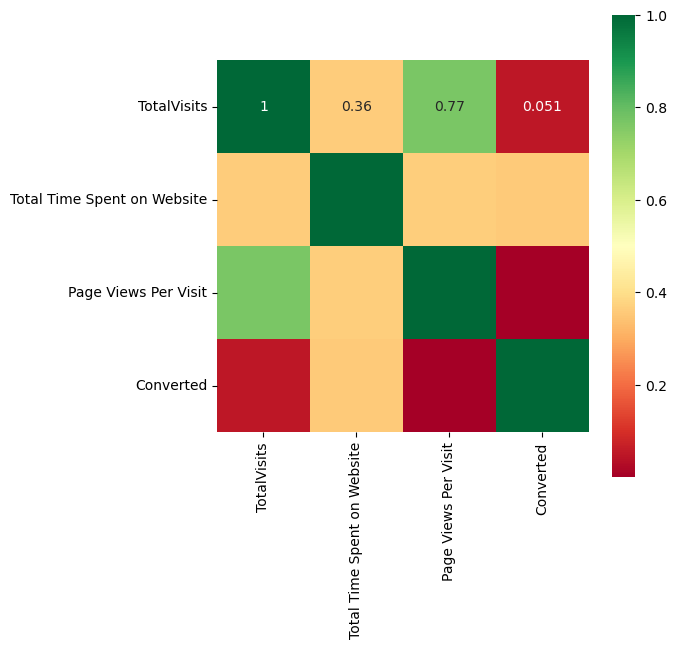

In [95]:
corrFeatures = numericalFeatures + targetFeature

plt.figure(figsize = (6,6))

sns.heatmap(data[corrFeatures].corr(),cmap='RdYlGn',annot=True,square=True)
plt.show()

'TotalVisits', 'Page Views Per Visit' are positively high correlated with each other.

### Dummy variable creation for categorical variables

In [96]:
categoricalFeatures

['Lead Origin',
 'Lead Source',
 'Specialization',
 'What is your current occupation']

In [97]:
# Creating a dummy variables for some of the categorical variables and dropping the first one

dummy = pd.get_dummies(data[['Lead Origin', 'Lead Source', 'What is your current occupation', 'Specialization']], drop_first=True)

dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Press_Release,Lead Source_Reference,...,What is your current occupation_Unknown,What is your current occupation_Working Professional,Specialization_Business Administration,Specialization_International Business,Specialization_Management Specializations,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Other Specialization,Specialization_Travel and Tourism
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [98]:
dummy.shape

(9074, 27)

In [99]:
# Concatenating to the master dataframe

data = pd.concat([data,dummy],axis=1)
data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,A free copy of Mastering The Interview,...,What is your current occupation_Unknown,What is your current occupation_Working Professional,Specialization_Business Administration,Specialization_International Business,Specialization_Management Specializations,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Other Specialization,Specialization_Travel and Tourism
0,API,Olark Chat,0,0,0.0,0,0.0,Not Specified,Unemployed,0,...,0,0,0,0,0,0,1,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Not Specified,Unemployed,0,...,0,0,0,0,0,0,1,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Business Administration,Student,1,...,0,0,1,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Media and Advertising,Unemployed,0,...,0,0,0,0,0,1,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Not Specified,Unemployed,0,...,0,0,0,0,0,0,1,0,0,0


In [100]:
# Dropping the variables as dummies have been created for the below variables

data = data.drop(categoricalFeatures,axis=1)

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 33 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9074 non-null   int64  
 1   Converted                                             9074 non-null   int64  
 2   TotalVisits                                           9074 non-null   float64
 3   Total Time Spent on Website                           9074 non-null   int64  
 4   Page Views Per Visit                                  9074 non-null   float64
 5   A free copy of Mastering The Interview                9074 non-null   int64  
 6   Lead Origin_Landing Page Submission                   9074 non-null   uint8  
 7   Lead Origin_Lead Add Form                             9074 non-null   uint8  
 8   Lead Origin_Lead Import                               9074

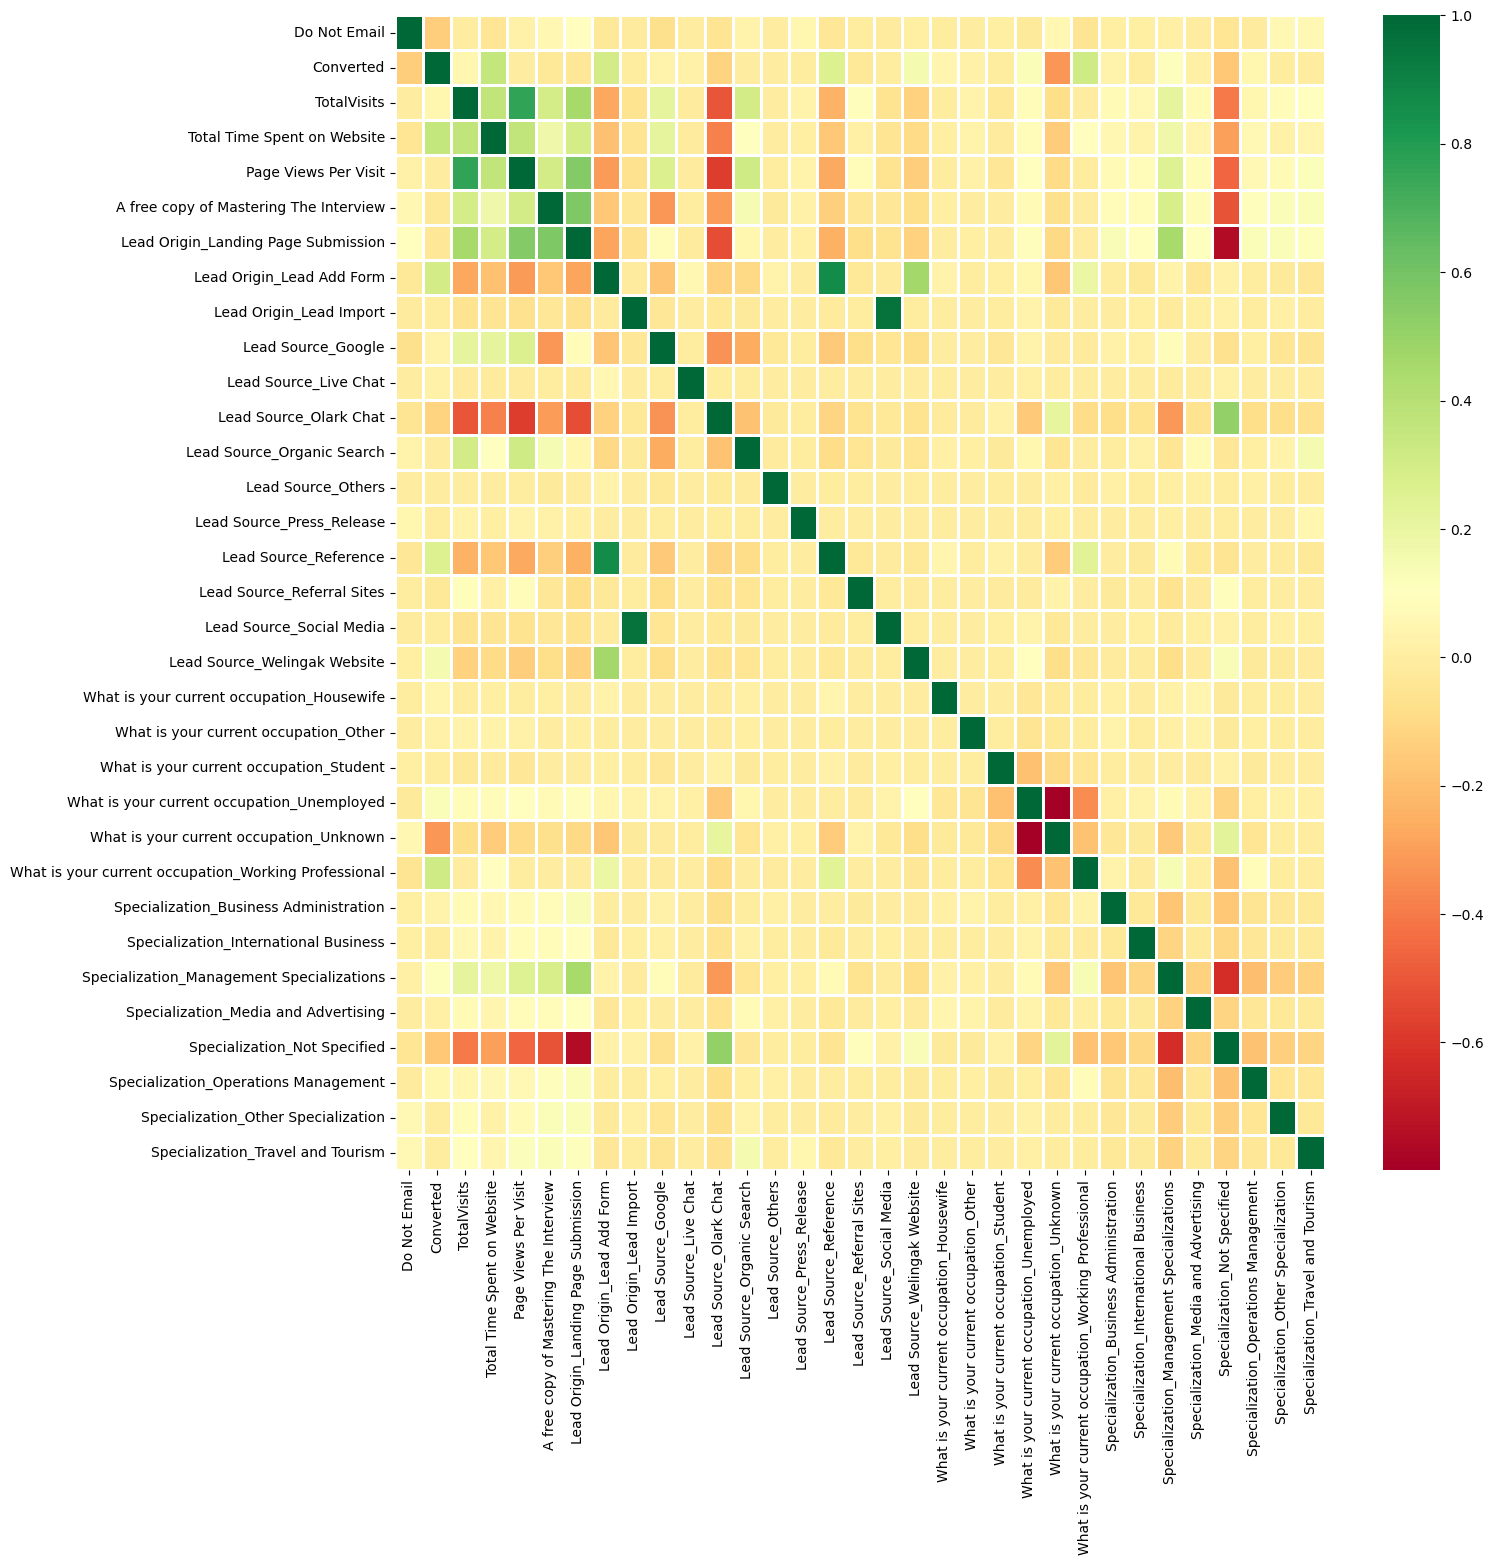

In [102]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),cmap='RdYlGn',linewidth=1)
plt.show()

In [103]:
# Finding correlated values of all variables

corr = data.corr()
corrdf = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset=['Correlation'],inplace=True)
corrdf['Correlation']=round(corrdf['Correlation'],2)

In [104]:
# Finding top 10 positively correlated values

corrdf.sort_values(by='Correlation',ascending=False).head(10)

,Var1,Var2,Correlation
569,Lead Source_Social Media,Lead Origin_Lead Import,0.95
502,Lead Source_Reference,Lead Origin_Lead Add Form,0.87
134,Page Views Per Visit,TotalVisits,0.77
203,Lead Origin_Landing Page Submission,A free copy of Mastering The Interview,0.56
202,Lead Origin_Landing Page Submission,Page Views Per Visit,0.55
968,Specialization_Not Specified,Lead Source_Olark Chat,0.51
601,Lead Source_Welingak Website,Lead Origin_Lead Add Form,0.46
200,Lead Origin_Landing Page Submission,TotalVisits,0.45
897,Specialization_Management Specializations,Lead Origin_Landing Page Submission,0.45
135,Page Views Per Visit,Total Time Spent on Website,0.36


In [105]:
# Finding top 10 negatively correlated values

corrdf.sort_values(by='Correlation',ascending=True).head(10)

,Var1,Var2,Correlation
781,What is your current occupation_Unknown,What is your current occupation_Unemployed,-0.80
963,Specialization_Not Specified,Lead Origin_Landing Page Submission,-0.76
984,Specialization_Not Specified,Specialization_Management Specializations,-0.62
367,Lead Source_Olark Chat,Page Views Per Visit,-0.58
369,Lead Source_Olark Chat,Lead Origin_Landing Page Submission,-0.53
962,Specialization_Not Specified,A free copy of Mastering The Interview,-0.51
365,Lead Source_Olark Chat,TotalVisits,-0.50
961,Specialization_Not Specified,Page Views Per Visit,-0.46
959,Specialization_Not Specified,TotalVisits,-0.40
366,Lead Source_Olark Chat,Total Time Spent on Website,-0.38


# Data Preparation for Modeling

In [108]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_recall_curve

## Train-Test split

In [109]:
y = data['Converted']
X = data.drop('Converted',axis=1)

In [110]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=300)

## Feature Scaling

In [111]:
numericalFeatures

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [112]:
scaler = StandardScaler()
X_train[numericalFeatures] = scaler.fit_transform(X_train[numericalFeatures])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Live Chat,...,What is your current occupation_Unknown,What is your current occupation_Working Professional,Specialization_Business Administration,Specialization_International Business,Specialization_Management Specializations,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Other Specialization,Specialization_Travel and Tourism
839,0,-1.140599,-0.882494,-1.260737,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7620,0,0.300552,-0.501121,0.976935,1,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2735,0,2.101990,-0.230291,0.417517,1,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1192,0,0.660839,-0.532441,1.536353,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2063,0,0.300552,-0.276350,0.976935,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


# Model Building

## Building first model with all columns

In [115]:
logm = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6318
Model Family:                Binomial   Df Model:                           32
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2791.9
Date:                Mon, 10 Jun 2024   Deviance:                       5583.8
Time:                        23:04:52   Pearson chi2:                 6.69e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3558
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7263      1.472     -1.173      0.241      -4.612       1.159
Do Not Email                                            -1.3375      0.169     -7.898      0.000      -1.669      -1.006
TotalVisits                                              0.2679      0.052      5.156      0.000       0.166       0.370
Total Time Spent on Website                              1.0768      0.039     27.519      0.000       1.000       1.154
Page Views Per Visit                                    -0.1663      0.060     -2.791      0.005      -0.283      -0.050
A free copy of Mastering The Interview                  -0.2679      0.104     -2.575      0.010      -0.472      -0.064
Lead Origin_Landing Page Submission                     -0.5751      0.130     -4.428      0.000      -0.830      -0.321
Lead Origin_Lead Add Form                                0.8240      1.074      0.768      0.443      -1.280       2.928
Lead Origin_Lead Import                                 21.7587   3.41e+04      0.001      0.999   -6.68e+04    6.68e+04
Lead Source_Google                                       0.0577      0.110      0.526      0.599      -0.157       0.273
Lead Source_Live Chat                                   23.8350   3.41e+04      0.001      0.999   -6.68e+04    6.68e+04
Lead Source_Olark Chat                                   1.2009      0.155      7.751      0.000       0.897       1.505
Lead Source_Organic Search                               0.1020      0.124      0.820      0.412      -0.142       0.346
Lead Source_Others                                       0.2947      0.821      0.359      0.719      -1.314       1.903
Lead Source_Press_Release                              -19.9417   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Source_Reference                                    2.8270      1.096      2.579      0.010       0.678       4.976
Lead Source_Referral Sites                              -0.3819      0.340     -1.122      0.262      -1.049       0.285
Lead Source_Social Media                               -20.6099   3.41e+04     -0.001      1.000   -6.68e+04    6.68e+04
Lead Source_Welingak Website                             5.1520      1.296      3.977      0.000       2.613       7.691
What is your current occupation_Housewife               23.2127   2.13e+04      0.001      0.999   -4.18e+04    4.18e+04
What is your current occupation_Other                    1.5187      1.629      0.932      0.351      -1.675       4.712
What is your current occupation_Student                  1.7311      1.477      1.172      0.241      -1.163       4.625
What is your current occupation_Unemployed               1

## Feature selection using RFE

In [119]:
from sklearn.feature_selection import RFE

In [116]:
logreg = LogisticRegression()

In [121]:
# Running RFE with 20 variables as output

rfe = RFE(estimator=logreg, n_features_to_select=20)             
rfe = rfe.fit(X_train, y_train)

In [122]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('A free copy of Mastering The Interview', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', False, 13),
 ('Lead Source_Live Chat', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 11),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Press_Release', False, 10),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', True, 1),
 ('What is your current occupation_Student', False, 4),
 ('What is your current occupation_Unemployed', False, 12),
 ('What is your current occupation_Unknown', True, 1),
 ('W

In [124]:
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Live Chat',
       'Lead Source_Olark Chat', 'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_Welingak Website',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Unknown',
       'What is your current occupation_Working Professional',
       'Specialization_Not Specified', 'Specialization_Travel and Tourism'],
      dtype='object')

## Assessing the model with StatsModels

The following methods will be followed in order to reduce the features until we reach reasonable amount of feature count:
1. High P-value
2. High VIF

In [125]:
# Defining a function to generate the model

def generate_model(model_no,cols):
    X_train_sm = sm.add_constant(X_train[cols])
    model_no = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
    res = model_no.fit()
    print(res.summary())
    return res

In [126]:
# Defining a function to calculate VIF

def calculateVIF(col):
    vif = pd.DataFrame()
    vif['Features'] = X_train[cols].columns
    vif['VIF'] = [variance_inflation_factor(X_train[cols].values,i) for i in range (X_train[cols].shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by = 'VIF', ascending = False)
    return vif

## Model - Iteration 1

In [135]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res = logm1.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2798.7
Date:                Wed, 12 Jun 2024   Deviance:                       5597.3
Time:                        17:59:25   Pearson chi2:                 6.70e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3544
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [136]:
calculateVIF(cols).head()

,Features,VIF
5,Lead Origin_Lead Add Form,74.98
10,Lead Source_Reference,58.13
12,Lead Source_Welingak Website,17.72
4,Lead Origin_Landing Page Submission,2.59
8,Lead Source_Olark Chat,2.25


In [137]:
# Dropping the column that has high p-value

cols = cols.drop('What is your current occupation_Housewife',1)

## Model - Iteration 2

In [138]:
# Let's re-run the model using the selected variables

X_train_sm = sm.add_constant(X_train[cols])
logm2 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2799.7
Date:                Wed, 12 Jun 2024   Deviance:                       5599.4
Time:                        18:02:57   Pearson chi2:                 6.71e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3542
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [139]:
calculateVIF(cols).head()

,Features,VIF
5,Lead Origin_Lead Add Form,74.98
10,Lead Source_Reference,58.12
12,Lead Source_Welingak Website,17.72
4,Lead Origin_Landing Page Submission,2.59
8,Lead Source_Olark Chat,2.25


In [140]:
# Dropping the column that has high p-value

cols = cols.drop('Lead Source_Live Chat',1)

## Model - Iteration 3

In [141]:
# Let's re-run the model using the selected variables

X_train_sm = sm.add_constant(X_train[cols])
logm3 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res = logm3.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2801.7
Date:                Wed, 12 Jun 2024   Deviance:                       5603.4
Time:                        18:04:45   Pearson chi2:                 6.70e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3538
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [142]:
calculateVIF(cols).head()

,Features,VIF
5,Lead Origin_Lead Add Form,54.29
9,Lead Source_Reference,42.31
11,Lead Source_Welingak Website,13.07
4,Lead Origin_Landing Page Submission,2.59
7,Lead Source_Olark Chat,2.25


In [143]:
# Dropping the column that has high p-value

cols = cols.drop('Lead Source_Others',1)

## Model - Iteration 4

In [144]:
# Let's re-run the model using the selected variables

X_train_sm = sm.add_constant(X_train[cols])
logm4 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res = logm4.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2801.7
Date:                Wed, 12 Jun 2024   Deviance:                       5603.4
Time:                        18:06:03   Pearson chi2:                 6.70e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3538
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [145]:
calculateVIF(cols).head()

,Features,VIF
5,Lead Origin_Lead Add Form,49.17
8,Lead Source_Reference,38.43
10,Lead Source_Welingak Website,11.94
4,Lead Origin_Landing Page Submission,2.59
7,Lead Source_Olark Chat,2.25


In [146]:
# Dropping the column that has high p-value

cols = cols.drop('What is your current occupation_Other',1)

## Model - Iteration 5

In [147]:
# Let's re-run the model using the selected variables

X_train_sm = sm.add_constant(X_train[cols])
logm5 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res = logm5.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2801.9
Date:                Wed, 12 Jun 2024   Deviance:                       5603.7
Time:                        18:07:31   Pearson chi2:                 6.70e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3538
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [148]:
calculateVIF(cols).head()

,Features,VIF
5,Lead Origin_Lead Add Form,49.17
8,Lead Source_Reference,38.43
10,Lead Source_Welingak Website,11.94
4,Lead Origin_Landing Page Submission,2.59
7,Lead Source_Olark Chat,2.24


In [149]:
# Dropping the column that has high p-value

cols = cols.drop('Specialization_Travel and Tourism',1)

## Model - Iteration 6

In [150]:
# Let's re-run the model using the selected variables

X_train_sm = sm.add_constant(X_train[cols])
logm6 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res = logm6.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2802.5
Date:                Wed, 12 Jun 2024   Deviance:                       5605.0
Time:                        18:08:57   Pearson chi2:                 6.70e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3536
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [151]:
calculateVIF(cols).head()

,Features,VIF
5,Lead Origin_Lead Add Form,49.17
8,Lead Source_Reference,38.43
10,Lead Source_Welingak Website,11.94
4,Lead Origin_Landing Page Submission,2.59
7,Lead Source_Olark Chat,2.24


In [152]:
# Dropping the column that has high p-value

cols = cols.drop('Lead Source_Referral Sites',1)

## Model - Iteration 7

In [153]:
# Let's re-run the model using the selected variables

X_train_sm = sm.add_constant(X_train[cols])
logm7 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res = logm7.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2803.6
Date:                Wed, 12 Jun 2024   Deviance:                       5607.2
Time:                        18:10:12   Pearson chi2:                 6.71e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3534
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [154]:
calculateVIF(cols).head()

,Features,VIF
5,Lead Origin_Lead Add Form,49.17
8,Lead Source_Reference,38.43
9,Lead Source_Welingak Website,11.94
4,Lead Origin_Landing Page Submission,2.58
7,Lead Source_Olark Chat,2.23


In [155]:
# Dropping the column that has high p-value

cols = cols.drop('Lead Source_Reference',1)

## Model - Iteration 8

In [156]:
# Let's re-run the model using the selected variables

X_train_sm = sm.add_constant(X_train[cols])
logm8 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res = logm8.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2804.8
Date:                Wed, 12 Jun 2024   Deviance:                       5609.7
Time:                        18:11:19   Pearson chi2:                 6.70e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3532
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [157]:
calculateVIF(cols).head()

,Features,VIF
4,Lead Origin_Landing Page Submission,2.58
7,Lead Source_Olark Chat,2.23
3,A free copy of Mastering The Interview,2.19
11,Specialization_Not Specified,2.05
1,TotalVisits,1.64


In [158]:
# Dropping the column that has high p-value

cols = cols.drop('Lead Origin_Lead Import',1)

## Model - Iteration 9

In [159]:
# Let's re-run the model using the selected variables

X_train_sm = sm.add_constant(X_train[cols])
logm9 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res = logm9.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2807.5
Date:                Wed, 12 Jun 2024   Deviance:                       5615.0
Time:                        18:12:26   Pearson chi2:                 6.70e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3526
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [161]:
calculateVIF(cols)

,Features,VIF
4,Lead Origin_Landing Page Submission,2.58
6,Lead Source_Olark Chat,2.21
3,A free copy of Mastering The Interview,2.19
10,Specialization_Not Specified,2.04
1,TotalVisits,1.64
8,What is your current occupation_Unknown,1.58
5,Lead Origin_Lead Add Form,1.56
7,Lead Source_Welingak Website,1.33
2,Total Time Spent on Website,1.29
9,What is your current occupation_Working Profes...,1.16


- Looking at the p-values, we can see that all variables are significant, in the presence of other variables.
- Variables have good value of VIF. So we can proceed with same

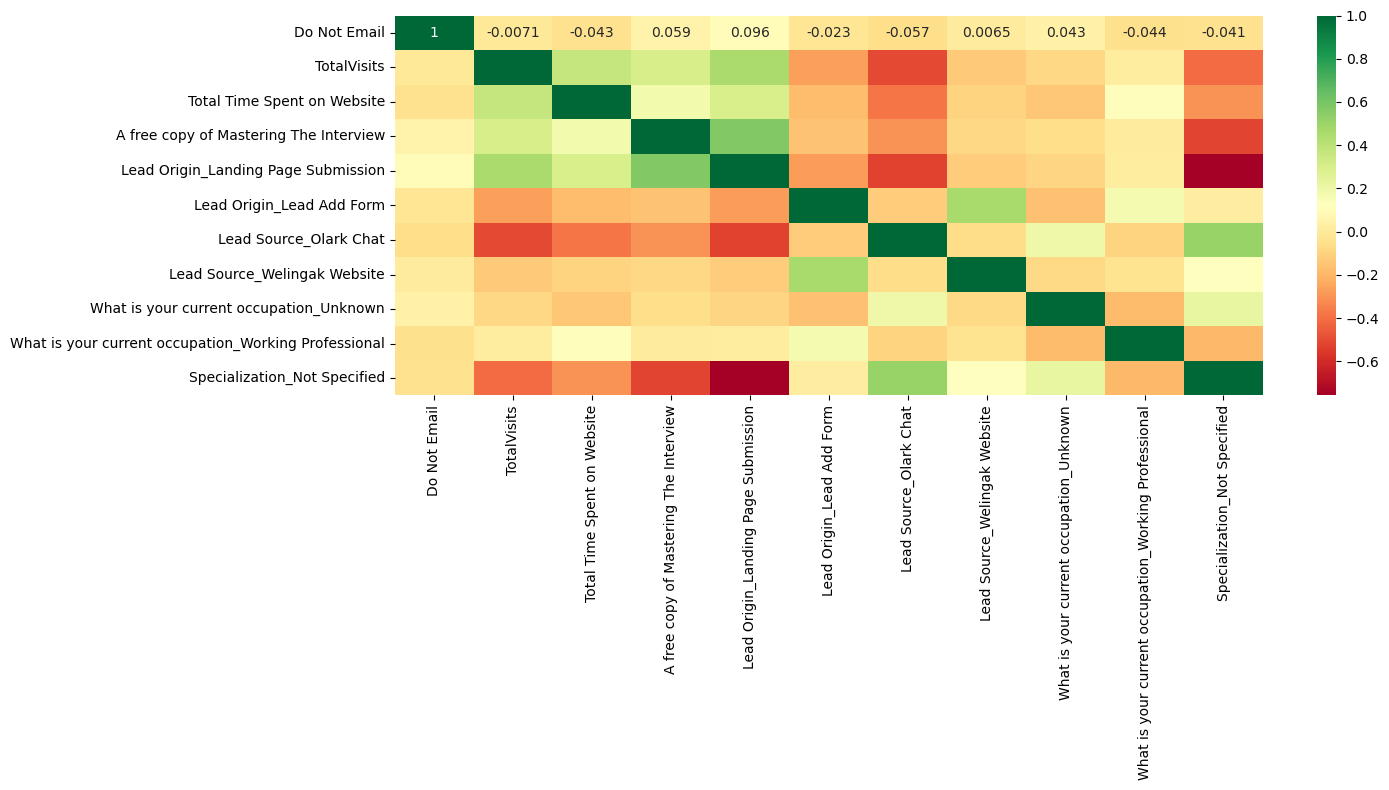

In [162]:
# Correlation heat map

corr = X_train[cols].corr()
plt.figure(figsize = (15,8))
sns.heatmap(corr, cmap='RdYlGn', annot=True)
plt.tight_layout()
plt.show()

## Predicted Probability Calculation

In [163]:
# Getting the predicted values on the training set

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.9187419 , 0.18732796, 0.10367827, 0.19193899, 0.27906157,
       0.7495521 , 0.09997536, 0.19966642, 0.06458726, 0.89022451])

In [164]:
# Creating a dataframe with the actual churn flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.918742,839
1,1,0.187328,7620
2,0,0.103678,2735
3,0,0.191939,1192
4,0,0.279062,2063


Choosing an arbitrary cut-off probability point of 0.5 to find the predicted labels.

In [165]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,1,0.918742,839,1
1,1,0.187328,7620,0
2,0,0.103678,2735,0
3,0,0.191939,1192,0
4,0,0.279062,2063,0


## Model Evaluation

### Confusion matrix

In [166]:
from sklearn import metrics

In [167]:
def calculate_metrics(actual, predicted):
    confusion = metrics.confusion_matrix(actual, predicted)
    
    Accuracy = metrics.accuracy_score(actual, predicted)
    
    TN = confusion[0,0]  #true negatives
    FP = confusion[0,1]  #false positives
    FN = confusion[1,0]  #false negatives
    TP = confusion[1,1]  #true positives
    
    Sensitivity = TP / float(TP+FN)
    Specificity = TN / float(TN+FP) 
    
    Precision   = TP / float(TP+FP) 
    Recall      = TN / float(TN+FP) 
    
    TPR = TP/(TP + FN)              # True Positive Rate
    TNR = TN/(TN + FP)              # True Negative Rate
    
    FPR = (FP/ float(TN+FP))        # False Postive Rate
    FNR = FN/(TP + FN)              # False Negative Rate
    
    PPV = (TP / float(TP+FP))       # positive predictive value 
    NPV = (TN / float(TN+ FN))      # Negative predictive value
    F1 = 2*(Precision*Recall)/(Precision+Recall)

    
    print (f'The Evaluation Metrics for the Dataset ')
    print (f'----------------------------------------------------')
    print ("Model Accuracy value is              : ", round(Accuracy*100,2),"%")
    print ("Model Sensitivity value is           : ", round(Sensitivity*100,2),"%")
    print ("Model Specificity value is           : ", round(Specificity*100,2),"%")
    print ("Model Precision value is             : ", round(Precision*100,2),"%")
    print ("Model Recall value is                : ", round(Recall*100,2),"%")
    print ("Model True Positive Rate (TPR)       : ", round(TPR*100,2),"%")
    print ("Model False Positive Rate (FPR)      : ", round(FPR*100,2),"%")
    print ("Model Poitive Prediction Value is    : ", round(PPV*100,2),"%")
    print ("Model Negative Prediction value is   : ", round(NPV*100,2),"%")
    print ("Model F1 score is                    : ", round(F1*100,2),"%")

In [168]:
calculate_metrics(y_train_pred_final.Converted, y_train_pred_final.predicted)

The Evaluation Metrics for the Dataset 
----------------------------------------------------
Model Accuracy value is              :  80.32 %
Model Sensitivity value is           :  65.79 %
Model Specificity value is           :  88.89 %
Model Precision value is             :  77.73 %
Model Recall value is                :  88.89 %
Model True Positive Rate (TPR)       :  65.79 %
Model False Positive Rate (FPR)      :  11.11 %
Model Poitive Prediction Value is    :  77.73 %
Model Negative Prediction value is   :  81.5 %
Model F1 score is                    :  82.94 %


- Specificity was good (~89%) but sensitivity was only ~66%. Therefore, this needs to be taken care of.
- Sensitivity of ~ 66% was obtained because of the cut-off point of 0.5 that we had arbitrarily chosen.

### Plotting ROC Curve

A ROC curve demonstrates several things:

1. It shows the tradeoff between sensitivity and specificity.
2. The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test is.

In [169]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic(ROC)')
    plt.legend(loc="lower right")
    plt.show()

    return None

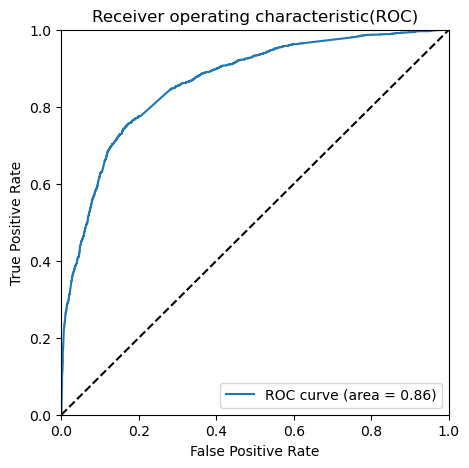

In [170]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

- The area under ROC Curve should be a value close to 1.
- The area under the curve is 86% of the total area.
- The curve is closer to the left side of the border than to the right side, therefore the model has great accuracy.

### Optimise Cut-off point

Optimal cutoff probability is the probability where we get balanced sensitivity ans specificity (they are equal).

In [175]:
# Let's create dataframe with different probability cutoffs 

prob = [float(x)/10 for x in range(10)]
for i in prob:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.918742,839,1,1,1,1,1,1,1,1,1,1,1
1,1,0.187328,7620,0,1,1,0,0,0,0,0,0,0,0
2,0,0.103678,2735,0,1,1,0,0,0,0,0,0,0,0
3,0,0.191939,1192,0,1,1,0,0,0,0,0,0,0,0
4,0,0.279062,2063,0,1,1,1,0,0,0,0,0,0,0


In [176]:
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity','Precision','Recall'])
prob = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in prob:
    cm = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i] )
    total=sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    
    specificity = cm[0,0]/(cm[0,0]+cm[0,1])
    sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
    precision, recall, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final[i])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity, precision[1], recall[1]]

print(cutoff_df)

     probability  accuracy  sensitivity  specificity  Precision    Recall
0.0          0.0  0.370965     1.000000     0.000000   1.000000  0.000000
0.1          0.1  0.593922     0.965195     0.374969   0.476630  0.965195
0.2          0.2  0.701307     0.907046     0.579975   0.560157  0.907046
0.3          0.3  0.792631     0.770798     0.805507   0.700347  0.770798
0.4          0.4  0.805385     0.716044     0.858073   0.748447  0.716044
0.5          0.5  0.803181     0.657895     0.888861   0.777332  0.657895
0.6          0.6  0.786333     0.559423     0.920150   0.805131  0.559423
0.7          0.7  0.763974     0.455857     0.945682   0.831913  0.455857
0.8          0.8  0.742403     0.351443     0.972966   0.884615  0.351443
0.9          0.9  0.713588     0.243209     0.990989   0.940887  0.243209


### Plot accuracy, sensitivity, and specificity

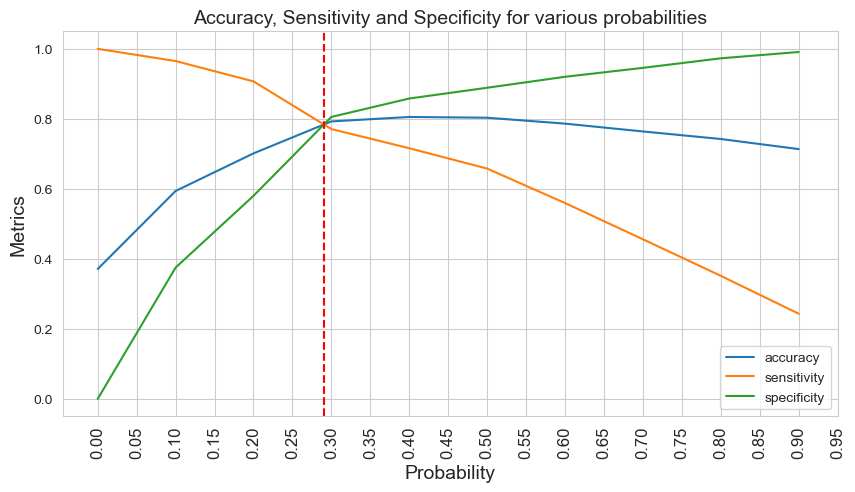

In [177]:
# Plot for 'accuracy','sensitivity','specificity'against Probability
sns.set_style("whitegrid")
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'], figsize=(10,5))
plt.xticks(np.arange(0, 1, step=0.05), size = 12)
plt.title('Accuracy, Sensitivity and Specificity for various probabilities', fontsize=14)
plt.xlabel('Probability', fontsize=14)
plt.ylabel('Metrics', fontsize=14)
plt.axvline(x=0.29, color='r', linestyle='--') 
plt.xticks(rotation=90)
plt.show()

From the curve, the optimum cutoff point seems to be 0.29.

In [178]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.29 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.918742,839,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.187328,7620,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.103678,2735,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.191939,1192,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.279062,2063,0,1,1,1,0,0,0,0,0,0,0,0


In [179]:
calculate_metrics(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])

The Evaluation Metrics for the Dataset 
----------------------------------------------------
Model Accuracy value is              :  78.96 %
Model Sensitivity value is           :  77.55 %
Model Specificity value is           :  79.8 %
Model Precision value is             :  69.36 %
Model Recall value is                :  79.8 %
Model True Positive Rate (TPR)       :  77.55 %
Model False Positive Rate (FPR)      :  20.2 %
Model Poitive Prediction Value is    :  69.36 %
Model Negative Prediction value is   :  85.77 %
Model F1 score is                    :  74.22 %


### Precision - Recall plot

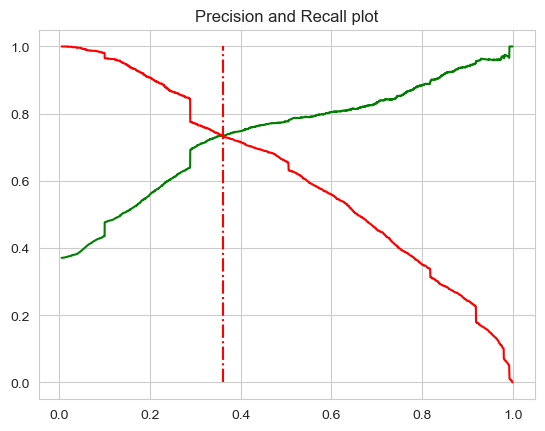

In [180]:
# Calcualting precision and recall
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_prob'])

# Plotting precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.vlines(x=0.36, ymax=1, ymin=0.0, colors="r", linestyles="-.")
plt.title("Precision and Recall plot")
plt.show()

- The graph "Precision and Recall plot" shows that the optimal threshold value is 0.35.
- Our business requirement is to have Lead Conversion Rate around 80%, therefore we use 0.29 as threshold value for Test Data Evaluation.
- Sensitivity indicates how many leads the model identifies correctly out of all potential leads being converted. Sensitivity = 74.82%
- Accuracy of the model is 80.05%.

In [182]:
# Assigning Lead_score for the leads in the training dataset
# Lead_score = 100 * ConversionProbability

y_train_pred_final['lead_score'] = (y_train_pred_final['Converted_prob']*100).astype('int64')
y_train_pred_final.sort_values(by='Converted_prob',ascending=False)

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
241,1,0.999510,818,1,1,1,1,1,1,1,1,1,1,1,1,99
1583,1,0.999343,4613,1,1,1,1,1,1,1,1,1,1,1,1,99
6023,1,0.999320,8120,1,1,1,1,1,1,1,1,1,1,1,1,99
4352,1,0.999044,7234,1,1,1,1,1,1,1,1,1,1,1,1,99
4015,1,0.998810,7187,1,1,1,1,1,1,1,1,1,1,1,1,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1534,0,0.009766,6934,0,1,0,0,0,0,0,0,0,0,0,0,0
2717,0,0.007304,5279,0,1,0,0,0,0,0,0,0,0,0,0,0
2409,0,0.006885,2454,0,1,0,0,0,0,0,0,0,0,0,0,0
1063,0,0.006494,8733,0,1,0,0,0,0,0,0,0,0,0,0,0


In [183]:
hot_leads=y_train_pred_final.loc[y_train_pred_final["lead_score"]>=85]
hot_leads.shape
print("There are {} hot leads who can be contacted and have a high chance of getting converted.".format(hot_leads.shape[0]))

There are 735 hot leads who can be contacted and have a high chance of getting converted.


## Model Evaluation: Test Dataset

In [184]:
# Scaling the test dataset 

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Live Chat,...,What is your current occupation_Unknown,What is your current occupation_Working Professional,Specialization_Business Administration,Specialization_International Business,Specialization_Management Specializations,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Other Specialization,Specialization_Travel and Tourism
7136,0,0.300552,1.171761,-0.516711,1,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3711,0,0.300552,1.142283,-0.141901,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1216,0,-1.140599,-0.882494,-1.260737,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6517,0,-0.059736,-0.875124,-0.421610,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4837,0,-0.059736,1.899502,0.417517,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [185]:
# Selecting only the columns used in final model of Train Dataset

X_test = X_test[cols]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,What is your current occupation_Unknown,What is your current occupation_Working Professional,Specialization_Not Specified
7136,0,0.300552,1.171761,1,1,0,0,0,0,1,0
3711,0,0.300552,1.142283,1,1,0,0,0,0,0,0
1216,0,-1.140599,-0.882494,0,0,0,1,0,0,0,1
6517,0,-0.059736,-0.875124,1,1,0,0,0,0,0,0
4837,0,-0.059736,1.899502,0,0,0,0,0,0,0,0


In [186]:
# Adding contant value

X_test_sm = sm.add_constant(X_test)

In [187]:
# Predicting the final test model 

y_test_pred = res.predict(X_test_sm).values.reshape(-1)

In [188]:
# Converting y_test_pred to a dataframe which is an array
y_test_pred = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Setting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_prob'], axis=1)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,7136,1,0.938074
1,3711,1,0.570450
2,1216,0,0.288544
3,6517,0,0.126820
4,4837,1,0.875696


In [189]:
#  Cutoff point = 0.29

y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.29 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,7136,1,0.938074,1
1,3711,1,0.570450,1
2,1216,0,0.288544,0
3,6517,0,0.126820,0
4,4837,1,0.875696,1


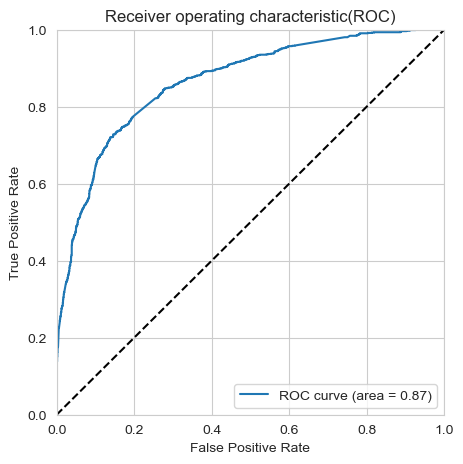

In [190]:
draw_roc(y_pred_final.Converted, y_pred_final.Converted_prob)

ROC value of 0.86 shows the model is performing well in test dataset.

In [191]:
# Assigning Lead_score for the leads in Test Data Set
# Lead Score = 100 * ConversionProbability

y_pred_final['lead_score']=(y_pred_final['Converted_prob']*100).astype("int64")
y_pred_final.sort_values(by='Converted_prob',ascending=False) 

,Prospect ID,Converted,Converted_prob,final_predicted,lead_score
1738,2378,1,0.999166,1,99
412,2984,1,0.999056,1,99
826,7327,1,0.998490,1,99
2023,7211,1,0.998253,1,99
1508,1614,1,0.997539,1,99
...,...,...,...,...,...
503,724,0,0.010753,0,1
1053,573,0,0.010147,0,1
514,2588,0,0.009926,0,0
754,6628,0,0.009535,0,0


In [192]:
calculate_metrics(y_pred_final['Converted'], y_pred_final['final_predicted'])

The Evaluation Metrics for the Dataset 
----------------------------------------------------
Model Accuracy value is              :  79.18 %
Model Sensitivity value is           :  77.2 %
Model Specificity value is           :  80.47 %
Model Precision value is             :  72.18 %
Model Recall value is                :  80.47 %
Model True Positive Rate (TPR)       :  77.2 %
Model False Positive Rate (FPR)      :  19.53 %
Model Poitive Prediction Value is    :  72.18 %
Model Negative Prediction value is   :  84.32 %
Model F1 score is                    :  76.1 %


## Final Observations

**The Evaluation Metrics for the Training Dataset**

In [193]:
calculate_metrics(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])

The Evaluation Metrics for the Dataset 
----------------------------------------------------
Model Accuracy value is              :  78.96 %
Model Sensitivity value is           :  77.55 %
Model Specificity value is           :  79.8 %
Model Precision value is             :  69.36 %
Model Recall value is                :  79.8 %
Model True Positive Rate (TPR)       :  77.55 %
Model False Positive Rate (FPR)      :  20.2 %
Model Poitive Prediction Value is    :  69.36 %
Model Negative Prediction value is   :  85.77 %
Model F1 score is                    :  74.22 %


**The Evaluation Metrics for the Test Dataset**

In [194]:
calculate_metrics(y_pred_final['Converted'], y_pred_final['final_predicted'])

The Evaluation Metrics for the Dataset 
----------------------------------------------------
Model Accuracy value is              :  79.18 %
Model Sensitivity value is           :  77.2 %
Model Specificity value is           :  80.47 %
Model Precision value is             :  72.18 %
Model Recall value is                :  80.47 %
Model True Positive Rate (TPR)       :  77.2 %
Model False Positive Rate (FPR)      :  19.53 %
Model Poitive Prediction Value is    :  72.18 %
Model Negative Prediction value is   :  84.32 %
Model F1 score is                    :  76.1 %


- Depending on the business requirement, we can increase or decrease the probability threshold value with in turn will decrease or increase the Sensitivity and increase or decrease the Specificity of the model.
- High Sensitivity will ensure that almost all leads who are likely to convert are correctly predicted where as high specificity will ensure that leads that are on the brinks of getting converted or not are not selected.

### Finding out the leads who should be contacted

The customers that should be contatced are the customers whose "Lead Score" is equal or greater than 85. They can be referred as "Hot Leads"

In [195]:
hot_leads=y_pred_final.loc[y_pred_final["lead_score"]>=85]
hot_leads.shape
print("There are {} hot leads who can be contacted and have a high chance of getting converted.".format(hot_leads.shape[0]))

There are 325 hot leads who can be contacted and have a high chance of getting converted.


## Recommendations

### Important features for lead scoring

In [197]:
res.params.sort_values(ascending=False)

Lead Origin_Lead Add Form                               3.627629
What is your current occupation_Working Professional    2.402787
Lead Source_Welingak Website                            2.385581
Lead Source_Olark Chat                                  1.222974
Total Time Spent on Website                             1.065566
TotalVisits                                             0.175917
const                                                  -0.061248
A free copy of Mastering The Interview                 -0.278838
Lead Origin_Landing Page Submission                    -0.646276
Specialization_Not Specified                           -0.923186
What is your current occupation_Unknown                -1.295032
Do Not Email                                           -1.354841
dtype: float64

The company should make calls to the leads who match the below criteria as these are more likely to be converted:
- who originate from "Add Form"
- who have their current occupation is "Working Professional"
- who are from Lead Source "Weligak Website" or "Olark Chat"
- who spend more time on website or visit it often.

The company should not make calls to the leads who match the below criteria as they tend to have no to little interest in course of X_Education:
- who opted for a free copy of Mastering the Interview
- who originate from Landing Page Submission
- who filled in Not Specified in Specialization category
- who do not have an occupation at that moment
- who chose the option "Yes" for Do not Email

**We can choose any other cut-off point as well based on which of the metrics we want to be high. To capture the 'Converted' better, we could have let go of a little accuracy and would've chosen an even lower cut-off. Optimal cut-off = 0.29, but to increase the sensitivity to > 80%, the cut-off must be 0.288**

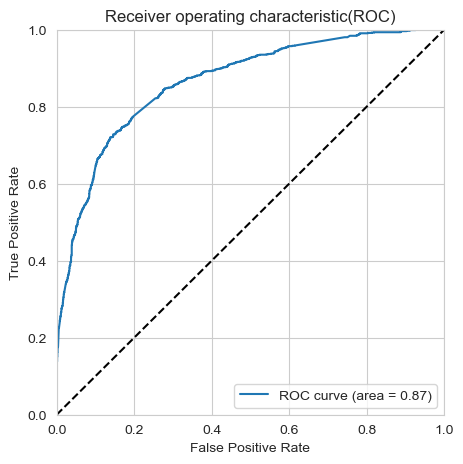

The Evaluation Metrics for the Dataset 
----------------------------------------------------
Model Accuracy value is              :  76.55 %
Model Sensitivity value is           :  84.42 %
Model Specificity value is           :  71.91 %
Model Precision value is             :  63.93 %
Model Recall value is                :  71.91 %
Model True Positive Rate (TPR)       :  84.42 %
Model False Positive Rate (FPR)      :  28.09 %
Model Poitive Prediction Value is    :  63.93 %
Model Negative Prediction value is   :  88.67 %
Model F1 score is                    :  67.69 %


In [198]:
#  Cutoff point = 0.288

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.288 else 0)
draw_roc(y_pred_final.Converted, y_pred_final.Converted_prob)
calculate_metrics(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])

The Evaluation Metrics for the Dataset 
----------------------------------------------------
Model Accuracy value is              :  77.56 %
Model Sensitivity value is           :  82.21 %
Model Specificity value is           :  74.51 %
Model Precision value is             :  67.92 %
Model Recall value is                :  74.51 %
Model True Positive Rate (TPR)       :  82.21 %
Model False Positive Rate (FPR)      :  25.49 %
Model Poitive Prediction Value is    :  67.92 %
Model Negative Prediction value is   :  86.45 %
Model F1 score is                    :  71.06 %


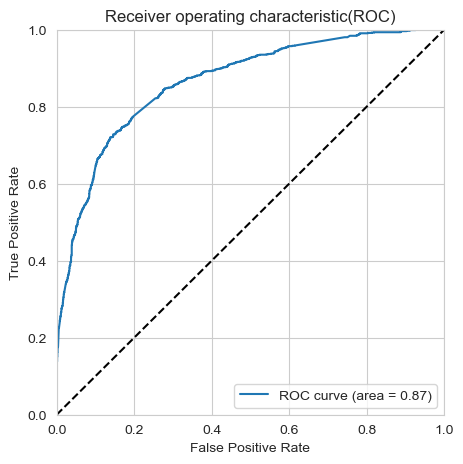

In [199]:
#  Cutoff point = 0.288

y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.288 else 0)
calculate_metrics(y_pred_final['Converted'], y_pred_final['final_predicted'])
draw_roc(y_pred_final.Converted, y_pred_final.Converted_prob)